# Mutli-Run Evaluation

In [1]:
import sys
import os
# Make sure the root or 03_optimization folder is in the path
sys.path.append(os.path.abspath('../'))   # adjust path if needed
sys.path.append(os.path.abspath('../..')) 

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pathlib import Path
import re

from evaluation.evaluator import Evaluator
from evaluation.multi_run_evaluator import MultiRunEvaluator

In [2]:
#time_of_executions = ["2025-08-14_13-01", "2025-08-14_15-34"] # 3 days all models (ideal weird) => gt_freq=15min
#time_of_executions = ["2025-08-14_15-59", "2025-08-14_16-04"] # 2 days all models (gt_freq=60min)

#time_of_executions = ["2025-08-14_17-20"] # 3 days all models gt_freq=60min

#time_of_executions = ["2025-08-15_11-55", "2025-08-15_15-54", "2025-08-16_08-40", "2025-08-16_08-43", "2025-08-16_10-43", "2025-08-17_18-45"] # 7 days, mpc_f=1h, gt_f=1min, 4 models, including fixed rule-based implementation electricity_price_estimation3.csv
#time_of_executions = ["2025-08-16_12-48"] # First 15min resolution. SFH4, gt_freq=1min, 1 week, all models

#time_of_executions = ["2025-08-16_13-04", "2025-08-16_13-11"] # detection of wrong rule-base implementation
#time_of_executions = ["2025-08-16_13-16"] # with adjusted prices DImport=5, => Interval and MPCProb many bad solver results
#time_of_executions = ["2025-08-16_14-32"] # original electricity_price_estimation.csv
#time_of_executions = ["2025-08-16_14-52", "2025-08-17_08-58"] # original electricity_price_estimation.csv but 1 full week for SFH12, SFH16, SFH30 (and load result from SFH4) (mpc=1h, gt=1min)

#time_of_executions = ["2025-08-16_12-40", "2025-08-16_12-41"] # rule based comparison for different frequencies

#time_of_executions = ["2025-08-17_18-58"] # completely static prices
#time_of_executions = ["2025-08-17_19-12"] # full tou tariffs

# Checking det constraint e_end=e0
#time_of_executions = ["2025-08-18_10-39"]  # Without end constraint and electricity_price_estimation4.csv
#time_of_executions = ["2025-08-18_10-42"]  # With end constraint    and electricity_price_estimation4.csv


#time_of_executions = ["2025-08-18_09-23", "2025-08-18_09-24"] # electricity_price_estimation3.csv => rule-based strong => Also bad solver result
#time_of_executions = ["2025-08-18_09-41", "2025-08-18_09-42"] # electricity_price_estimation4.csv => ???   => Also bad solver result

# FIXED BAD SOLVER STATE WHEN e not in [e_min, e_max]
#time_of_executions = ["2025-08-18_10-14", "2025-08-18_10-15"] # redone electricity_price_estimationDImp5.csv 

# Redo estimation3 and 4 with fixed solver results
#time_of_executions = ["2025-08-18_11-17", "2025-08-18_11-18"] # electricity_price_estimation3.csv => rule-based strong 
#time_of_executions = ["2025-08-18_11-19", "2025-08-18_11-20"] # electricity_price_estimation4.csv => ???   

#time_of_executions = ["2025-08-18_12-37", "2025-08-18_12-38", "2025-08-18_12-39"]  # electricity_price_estimation5.csv

# Check other TOU tarif with greater difference
#time_of_executions = ["2025-08-18_13-59", "2025-08-18_14-00"]  # using tou_prices2.csv

# Redone electricity_price_estimation3.csv with original config.json file
#time_of_executions = ["2025-08-18_14-09", "2025-08-18_14-10"] # electricity_price_estimation3 

# Check third TOU scheme with only Export changes
#time_of_executions = ["2025-08-18_14-40", "2025-08-18_14-41"]


# Test Quadratic objective
#time_of_executions = ["2025-08-19_11-43", "2025-08-19_12-42", "2025-08-19_12-45", "2025-08-19_12-46", "2025-08-19_13-34", "2025-08-19_13-43"]  # quad_prices.csv

# Quadratic objective for SFH4 and 15min; SFH12, SFH16; SFH30(with other forecast creation time (from max))
#time_of_executions = ["2025-08-19_14-40", "2025-08-19_14-41", "2025-08-20_08-30", "2025-08-20_08-31", "2025-08-20_08-32"]

# Quadratic Objective, mpc_freq=30
#time_of_executions = ["2025-08-20_12-48", "2025-08-20_12-49", "2025-08-21_08-00"]


# Testing exponential_prices.csv 
#time_of_executions = ["2025-08-20_16-56", "2025-08-21_14-52"] # exponential_prices.csv mpc_freq=1h + DET FORECAST
#time_of_executions = ["2025-08-21_09-41", "2025-08-21_09-42", "2025-08-21_09-43", "2025-08-21_14-53"] # exponential_prices.csv mpc_freq=30min


# Check other battery configs => 13.5 kWh
#time_of_executions = ["2025-08-21_10-19", "2025-08-21_10-21", "2025-08-21_14-06"] # exponential_prices.csv, mpc_freq=60min => Bigger battery



# GIGA CALCULATION
#time_of_executions = ["2025-08-21_16-46", "2025-08-21_16-49"] # 60min-JUNE-ALL_BUILDINGS-EXPONENTIAL-13.5
#time_of_executions = ["2025-08-21_16-52", "2025-08-21_16-54"] # 60min-SEPTEMBER- ALL_BUILDINGS-EXPONENTIAL-13.5

# Check new exp prices 
#time_of_executions = ["2025-08-22_08-24"] #exponential_prices2.csv => 3 buildings to check how rule-based differs now, JUNE
#time_of_executions = ["2025-08-22_09-40", "2025-08-22_09-41", "2025-08-22_09-42"] #exponential_prices2.csv NOVEMBER



# New quad prices for grid-friendliness quad_prices2.csv
#time_of_executions = ["2025-08-22_13-36"] # June
#time_of_executions = ["2025-08-22_13-37"] # November

#time_of_executions = ["2025-08-22_13-52"] # June GTFreq=1h
#time_of_executions = ["2025-08-22_13-48"] # November GTFreq = 1h


# Testing new metrics over averaged pg
#time_of_executions = ["2025-08-22_15-52", "2025-08-22_15-53"]
#time_of_executions = ["2025-08-22_16-07","2025-08-22_16-08", "2025-08-22_16-09", "2025-08-22_16-10"] # JUNE with new metrics quad_prices2.csv gtfreq=1min
#time_of_executions = ["2025-08-22_16-11", "2025-08-22_16-12", "2025-08-22_16-13"] # November


# Runs to check mpc freq impact on new metrics in November
#time_of_executions = ["2025-08-22_16-46"] # 60MIN, BASELINE
#time_of_executions = ["2025-08-22_16-47"] # 60MIN, SMALL BATTERY
#time_of_executions = ["2025-08-22_16-49", "2025-08-22_16-50", "2025-08-22_16-51", "2025-08-22_16-52"] # 30MIN
#time_of_executions = ["2025-08-22_16-55","2025-08-22_16-56", "2025-08-22_16-57", "2025-08-22_16-59"] # 15MIN



# Maybe combine TOU with exp tariff?
#time_of_executions = ["2025-08-25_13-36", "2025-08-25_13-38", "2025-08-25_13-39", "2025-08-25_15-19"] # JUNE tou_prices.csv MPC=1h
#time_of_executions = ["2025-08-25_13-41", "2025-08-25_13-42", "2025-08-25_13-43"] # November tou_prices.csv MPC=1h


# Investigate Rule-Based Enhanced MPC for June
#time_of_executions = ["2025-08-26_09-49", "2025-08-26_09-53", "2025-08-26_09-54", "2025-08-26_10-01", "2025-08-26_09-55", "2025-08-25_13-36", "2025-08-25_13-38", "2025-08-25_13-39", "2025-08-25_15-19"]
# RBMPC from July-September
time_of_executions = ["2025-08-26_10-20", "2025-08-26_10-21"]
# RBMPC from July-September in 30min resolution
#time_of_executions = ["2025-08-26_11-06", "2025-08-26_11-08", "2025-08-26_11-09"]

# RBMPC for November
#time_of_executions = ["2025-08-26_13-37", "2025-08-26_13-38", "2025-08-25_13-41", "2025-08-25_13-42", "2025-08-25_13-43"]
# New logic that covers load if discharging
#time_of_executions = ["2025-08-26_15-14", "2025-08-26_15-19", "2025-08-26_15-20", "2025-08-25_13-41", "2025-08-25_13-42", "2025-08-25_13-43"]

# RBMPC from October-December
#time_of_executions = ["2025-08-26_16-10", "2025-08-26_16-11"] # 60min resolution
#time_of_executions = ["2025-08-26_16-22", "2025-08-26_16-23", "2025-08-26_16-24"] # 30min resolution


# First battery degradation evaluation
time_of_executions = ["2025-08-27_16-35",  "2025-08-27_16-36"]
time_of_executions = ["2025-08-27_16-41"]
time_of_executions = ["2025-08-27_17-22"]

time_of_executions = ["2025-08-27_17-33"]  # Summer 2 months
#time_of_executions = ["2025-08-27_17-36"]  # Winter 2 months
time_of_executions = ["2025-09-03_15-43", "2025-09-03_15-46"]  # 1 Week in November with different battery degradation costs (0.0 0.084, 0.09, 0.1, 0.15) f60-gt60-cX
#time_of_executions = ["2025-09-03_15-53", "2025-09-03_15-54"]  # 1 Week in November with different battery degradation costs (0.0 0.084, 0.1, 0.15) f15-gt15-cX


# GIGA CALCULATION
#time_of_executions = ["2025-08-28_13-39"]  # f60-gt60-c0
time_of_executions = ["2025-08-29_11-24"]  # f60-gt60-c8  CHeck abgestürzt => Neu "2025-08-29_11-24"
#time_of_executions = ["2025-08-28_13-44"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-46"]  # f30-gt30-c0
#time_of_executions = ["2025-08-28_13-54"]  # f30-gt30-c8 time_of_executions = ["2025-08-29_11-24"]
#time_of_executions = ["2025-08-28_13-56"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59"]  # f30-gt1-c8

#time_of_executions = ["2025-08-28_14-02", "2025-08-28_14-03"]  # f15-gt15-c0
#time_of_executions = ["2025-08-28_14-06"]  # f15-gt15-c8
#time_of_executions = ["2025-08-28_14-04", "2025-09-15_10-40"]  # f15-gt1-c0
#time_of_executions = ["2025-08-28_14-09"]  # f15-gt1-c8


# Run new MPC-RuleBased Constant Grid runs
time_of_executions = ["2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-09-11_16-40"]  # f60-gt1-c8
#time_of_executions = ["2025-09-11_16-41"]  # f30-gt1-c0
#time_of_executions = ["2025-09-11_16-42"]  # f30-gt1-c8
#time_of_executions = ["2025-09-11_16-48", "2025-09-11_16-49"]  # f15-gt1-c8
#time_of_executions = ["2025-09-12_08-47", "2025-09-12_08-49", "2025-09-12_08-50"]  # f15-gt1-c0


# Fused experiments with new MPC-RBCCONSTGRID
time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41", "2025-09-15_10-35"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8






csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mre = MultiRunEvaluator(run_paths=csvs)

mre.leaderboard_mean()
#mre.leaderboard()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,60.0,1192.95,253.70,1118.82,167.37,3678.01,1798.91,0.0,9.90,86.33,84.45,84.45,1.00
1,ideal_rule,15,15,60.0,1224.48,268.55,1158.11,164.62,3290.86,1609.22,0.0,9.95,103.93,102.04,102.04,2.07
2,mpc_det_rule_constGrid,15,15,60.0,1274.68,291.92,1204.80,175.62,3552.88,1738.47,0.0,8.17,116.30,114.74,114.74,2.93
3,mpc_det_rule,15,15,60.0,1295.14,301.21,1235.04,171.73,3077.84,1505.84,0.0,7.99,129.47,127.96,127.96,4.00
4,ideal,15,15,60.0,1710.38,415.57,1643.96,227.84,3294.60,1611.07,0.0,9.92,187.74,185.85,185.85,5.07
5,rule-based,15,15,60.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,0.0,0.31,202.39,202.33,202.33,5.93


In [2]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref60_gt1_c8 = MultiRunEvaluator(run_paths=csvs)

mref60_gt1_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule,15,15,60.0,1255.59,275.95,1210.80,131.69,2219.43,1084.30,91.08,10.01,144.27,142.36,233.44,1.27
1,ideal_rule_constGrid,15,15,60.0,1207.75,256.79,1153.98,124.28,2664.88,1302.53,109.41,9.99,132.51,130.61,240.02,2.07
2,rule-based,15,15,60.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,48.33,0.31,202.39,202.33,250.67,3.47
3,mpc_det_rule,15,15,60.0,1343.28,312.69,1305.08,142.20,1990.64,973.19,81.75,8.05,170.48,168.95,250.70,3.33
4,mpc_det_rule_constGrid,15,15,60.0,1318.83,303.31,1266.00,139.08,2700.87,1320.99,110.96,8.33,164.23,162.65,273.61,4.87
5,ideal,15,15,60.0,1671.39,404.92,1629.33,181.42,2085.08,1018.48,85.55,10.00,223.50,221.60,307.15,6.00


In [4]:
mref60_gt1_c8.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1127.4211,277.050004,1792.8617,192.690414,2007.8129,980.9053,82.3960,9.4456,84.359590,82.564926,164.960926
1,rule-based,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),968.6843,296.143907,1657.0230,175.930760,1341.7525,659.3241,55.3832,0.0000,120.213148,120.213148,175.596348
2,ideal_rule_constGrid,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1052.0761,251.769989,1702.8303,180.292782,2752.7149,1346.0131,113.0651,9.0850,71.477207,69.751057,182.816157
3,mpc_det_rule,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1218.3067,312.306588,1881.8425,203.160809,1975.6876,963.8903,80.9668,11.9999,109.145780,106.865799,187.832599
4,mpc_det_rule_constGrid,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1179.2025,301.688438,1820.8988,196.988131,2992.1054,1461.1794,122.7391,13.3080,104.700306,102.171786,224.910886
5,ideal,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1532.8173,404.985706,2200.6477,244.477872,1907.5477,931.9677,78.2853,9.0811,160.507834,158.782425,237.067725



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1417.9328,308.030609,1803.7375,193.448250,2565.4112,1252.7088,105.2275,12.1740,114.582359,112.269299,217.496799
1,ideal_rule_constGrid,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1355.0844,283.234637,1729.0907,184.077579,3151.7771,1539.9925,129.3594,12.1279,99.157058,96.852757,226.212157
2,rule-based,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1293.4719,354.601572,1708.6259,182.243291,1535.5593,752.4575,63.2064,3.6259,172.358281,171.669360,234.875760
3,mpc_det_rule,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1605.4861,378.688453,2009.3887,215.330142,2085.4507,1021.7775,85.8293,3.7697,163.358311,162.642068,248.471368
4,mpc_det_rule_constGrid,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1556.7017,360.777567,1937.9439,211.557491,3221.0546,1578.2493,132.5729,3.4908,149.220076,148.556824,281.129724
5,ideal,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1901.8104,458.389965,2290.5001,251.830399,2422.0108,1182.4511,99.3259,12.1858,206.559566,204.244264,303.570164



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),2322.9707,513.733329,1600.6834,172.315881,4103.7461,2006.5388,168.5493,11.7747,341.417448,339.180255,507.729555
1,ideal_rule,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2414.6893,550.996670,1702.3607,184.853875,3602.9384,1761.1143,147.9336,11.9323,366.142794,363.875657,511.809257
2,rule-based,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2251.6874,622.619247,1581.3002,170.551604,2117.2153,1039.2234,87.2948,0.0000,452.067643,452.067643,539.362443
3,mpc_det_rule,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2597.6777,612.364449,1889.1496,206.007848,3419.2199,1671.1552,140.3770,11.8429,406.356601,404.106450,544.483450
4,mpc_det_rule_constGrid,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2563.0748,595.375826,1838.6140,200.939161,4168.3423,2037.7501,171.1710,12.6436,394.436665,392.034381,563.205381
5,ideal,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2863.0151,684.132200,2155.4628,237.417602,3374.6706,1649.3685,138.5470,11.7670,446.714599,444.478869,583.025869



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),1075.6187,223.040713,823.9858,87.961912,2919.0613,1426.2542,119.8054,11.5894,135.078801,132.876815,252.682215
1,ideal_rule,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1147.0862,250.991856,903.7075,98.134645,2505.6149,1223.6582,102.7873,11.6868,152.857211,150.636719,253.424019
2,rule-based,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.8347,283.672811,755.9989,81.252501,1522.5199,747.8821,62.8221,0.0000,202.420309,202.420309,265.242409
3,mpc_det_rule,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1281.6076,304.751286,1051.8797,114.831768,2048.7685,1002.0604,84.1731,7.2634,189.919518,188.539472,272.712572
4,mpc_det_rule_constGrid,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1243.2706,292.837052,996.2847,108.983557,2897.6650,1417.8796,119.1019,7.3737,183.853494,182.452491,301.554391
5,ideal,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1690.2747,420.036849,1450.6857,163.464812,2322.4845,1133.9878,95.2550,11.5963,256.572037,254.368740,349.623740



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,240/220320 (0.11%),1114.0508,241.240817,1876.8338,201.354323,2192.1939,1070.9317,89.9583,10.0494,39.886494,37.977108,127.935408
1,ideal_rule_constGrid,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1062.2181,218.887411,1814.5995,193.987831,2708.4688,1323.8684,111.2049,10.0223,24.899580,22.995343,134.200243
2,rule-based,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1009.5354,278.384201,1798.3326,192.467909,1354.0978,664.8908,55.8508,0.9629,85.916292,85.733341,141.584141
3,mpc_det_rule,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1161.8187,269.370402,1934.0179,208.398696,2066.5566,1012.8212,85.0770,3.1696,60.971706,60.369482,145.446482
4,mpc_det_rule_constGrid,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1149.6350,258.365136,1902.2609,211.065723,2952.5711,1446.0418,121.4675,4.8458,47.299413,46.378711,167.846211
5,ideal,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1535.1114,367.503962,2300.8252,250.351754,2045.6992,999.1498,83.9286,10.0778,117.152208,115.237426,199.166026



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1251.1977,267.519067,1219.0776,129.864466,1998.0346,975.0624,81.9052,11.5512,137.654601,135.459873,217.365073
1,ideal_rule_constGrid,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1225.4302,256.129652,1185.5796,125.386293,2380.6577,1162.5086,97.6507,11.5528,130.743359,128.548327,226.199027
2,mpc_det_rule,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1300.1211,291.088240,1273.2642,136.580007,1929.7256,943.5394,79.2573,7.6671,154.508233,153.051484,232.308784
3,rule-based,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1147.5314,322.798884,1149.6515,121.629180,874.6979,430.5141,36.1632,0.0000,201.169704,201.169704,237.332904
4,mpc_det_rule_constGrid,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1283.1334,285.238917,1244.9730,135.719170,2481.7082,1213.8790,101.9658,7.8206,149.519747,148.033833,249.999633
5,ideal,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1645.1341,389.095420,1614.7674,177.022308,1911.5311,932.6873,78.3457,11.5452,212.073112,209.879524,288.225224



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1178.8198,241.234098,455.4004,47.886515,2433.6005,1189.0596,99.8810,10.3241,193.347583,191.386004,291.267004
1,ideal_rule,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1241.0084,261.667053,521.5828,57.449665,2256.2099,1102.3612,92.5983,9.9134,204.217388,202.333842,294.932142
2,mpc_det_rule,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1295.7036,292.206090,582.5380,63.695603,1939.6388,947.2056,79.5653,10.0482,228.510487,226.601329,306.166629
3,mpc_det_rule_constGrid,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1240.9402,277.207668,520.1576,55.424381,2313.2088,1130.1821,94.9353,10.1192,221.783287,219.860639,314.795939
4,rule-based,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1114.2610,325.454245,432.8888,45.575935,863.0394,424.8026,35.6834,0.0000,279.878310,279.878310,315.561710
5,ideal,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1635.0437,386.770137,917.3001,102.724585,2144.8230,1047.5087,87.9907,10.4816,284.045552,282.054048,370.044748



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),931.4532,200.485785,1842.6069,194.737351,2154.7958,1052.6723,88.4245,9.9257,5.748434,3.862551,92.287051
1,ideal_rule_constGrid,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),886.4805,181.489266,1787.9515,186.207738,2630.3884,1285.6272,107.9927,10.0015,-4.718473,-6.618758,101.373942
2,mpc_det_rule,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),1076.2936,244.083424,1995.3153,211.200564,1850.7432,904.5800,75.9847,8.1991,32.882860,31.325031,107.309731
3,rule-based,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),824.7431,236.189761,1762.3173,184.059756,1338.1193,657.5443,55.2337,0.0000,52.130006,52.130006,107.363706
4,mpc_det_rule_constGrid,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1034.0765,230.165171,1937.5222,204.998001,2610.8287,1276.8348,107.2541,8.4214,25.167170,23.567104,130.821204
5,ideal,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1303.2052,318.568513,2216.4387,239.422187,2050.5957,1001.6121,84.1354,9.9507,79.146326,77.255693,161.391093



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1818.3778,375.862360,540.9394,57.472331,3140.7647,1534.8822,128.9301,11.5586,318.390030,316.193896,445.123996
1,ideal_rule,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1856.7060,392.305686,584.5972,63.028396,2876.7839,1405.5565,118.0667,11.5615,329.277290,327.080605,445.147305
2,mpc_det_rule,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1938.0599,431.118321,672.3131,72.376615,2573.5739,1257.1325,105.5991,11.3243,358.741705,356.590088,462.189188
3,mpc_det_rule_constGrid,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1898.1473,419.128156,622.0670,68.342431,3086.9926,1508.6751,126.7287,11.2867,350.785725,348.641252,475.369952
4,rule-based,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1734.5311,480.217767,507.9950,54.001351,1192.9407,586.4212,49.2594,0.0000,426.216417,426.216417,475.475817
5,ideal,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2352.2331,547.879145,1083.2355,122.765785,2722.8751,1330.1577,111.7332,11.5593,425.113361,422.917094,534.650294



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),623.6706,132.085602,1076.5087,119.505461,1170.6379,572.6354,48.1014,5.7206,12.580141,11.493227,59.594627
1,rule-based,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),558.9764,151.028743,1027.4450,113.742261,679.9872,335.1253,28.1505,0.0000,37.286482,37.286482,65.436982
2,mpc_det_rule,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),639.2949,143.964950,1093.5767,121.697730,1135.7565,555.9166,46.6970,4.9812,22.267220,21.320792,68.017792
3,ideal_rule_constGrid,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),600.5845,120.694059,1044.4611,115.443576,1615.8100,790.7407,66.4222,5.6897,5.250483,4.169440,70.591640
4,mpc_det_rule_constGrid,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),628.6586,137.509408,1071.8663,119.722750,1686.0998,825.5512,69.3463,4.9384,17.786658,16.848362,86.194662
5,ideal,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),952.9059,232.118875,1407.6857,157.754584,1075.3072,525.9409,44.1790,5.7046,74.364292,73.280418,117.459418



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1720.6530,382.717582,1025.1703,116.336848,2966.9247,1449.6920,121.7741,11.6104,266.380735,264.174759,385.948859
1,ideal_rule_constGrid,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1658.1782,359.832622,952.9532,107.168405,3449.4615,1686.0893,141.6315,11.6054,252.664217,250.459191,392.090691
2,mpc_det_rule,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1812.3575,425.473400,1122.6989,126.772628,2681.2713,1309.7774,110.0213,11.5565,298.700772,296.505037,406.526337
3,rule-based,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1581.2434,462.311243,929.5850,105.021177,1372.0588,674.1712,56.6304,0.0000,357.290067,357.290067,413.920467
4,mpc_det_rule_constGrid,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1801.4643,417.154458,1096.6159,124.382457,3428.9069,1676.0003,140.7840,11.6441,292.772001,290.559622,431.343622
5,ideal,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),2265.6351,554.500941,1574.9924,181.893701,2728.4527,1332.8761,111.9616,11.5875,372.607240,370.405615,482.367215



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),787.0058,163.874213,961.3606,107.003849,1444.3987,706.7495,59.3670,5.7233,56.870364,55.782937,115.149937
1,ideal_rule_constGrid,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),773.3598,155.959807,940.7328,104.343235,1791.0894,876.6040,73.6347,5.7019,51.616572,50.533211,124.167911
2,mpc_det_rule,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),825.2378,187.981546,1004.3164,111.741895,1271.9120,622.8680,52.3209,4.4835,76.239651,75.387786,127.708686
3,rule-based,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),728.5936,201.752058,923.5518,102.588680,707.6940,348.6989,29.2907,0.0000,99.163378,99.163378,128.454078
4,mpc_det_rule_constGrid,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),822.4621,184.226618,991.1697,111.312764,1788.0017,875.7274,73.5611,4.4294,72.913854,72.072268,145.633368
5,ideal,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1094.0833,259.886559,1270.1298,144.206944,1359.0380,664.9151,55.8529,5.7557,115.679615,114.586032,170.438932



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),616.8244,130.485978,755.6633,85.149077,1449.6221,707.7761,59.4532,8.7887,45.336901,43.667048,103.120248
1,ideal_rule_constGrid,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),585.2259,117.806494,719.0321,80.360492,1699.5917,830.2445,69.7405,8.7719,37.446002,35.779341,105.519841
2,rule-based,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),529.0600,157.415100,690.8813,77.601993,746.8692,367.8908,30.9028,0.0000,79.813107,79.813107,110.715907
3,mpc_det_rule,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),660.2493,153.133994,804.6350,91.151469,1270.3144,620.8956,52.1552,6.8634,61.982525,60.678479,112.833679
4,mpc_det_rule_constGrid,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),660.8797,151.112441,797.6529,90.214531,1672.4588,818.1616,68.7256,6.3525,60.897909,59.690934,128.416534
5,ideal,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),923.3720,224.760790,1064.1393,120.140918,1354.7876,661.3230,55.5511,8.7759,104.619872,102.952451,158.503551



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1076.6615,231.649736,1309.9856,144.184078,2198.7140,1074.9974,90.2998,8.3061,87.465658,85.887499,176.187299
1,ideal_rule_constGrid,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1033.5228,213.686929,1258.5849,137.655109,2606.4611,1274.7400,107.0782,8.3317,76.031821,74.448798,181.526998
2,mpc_det_rule,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1199.5296,273.784839,1443.1852,158.253921,1813.4079,887.5101,74.5508,5.7573,115.530919,114.437032,188.987832
3,rule-based,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.5027,279.073711,1229.6272,134.809596,1184.0624,582.0718,48.8940,0.0000,144.264115,144.264115,193.158115
4,mpc_det_rule_constGrid,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1178.4189,265.081696,1406.8444,155.381387,2576.3733,1261.3778,105.9557,5.5755,109.700310,108.640965,214.596665
5,ideal,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1462.9478,350.780514,1698.3885,189.662213,2092.6272,1023.0123,85.9330,8.3325,161.118301,159.535126,245.468126



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1507.4759,348.205898,785.9593,87.586948,1901.4057,927.6291,77.9208,11.7408,260.618950,258.388198,336.308998
1,mpc_det_rule,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1537.4582,370.002299,818.0299,91.869116,1797.5374,876.7391,73.6461,11.7507,278.133183,275.900550,349.546650
2,rule-based,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1416.5525,407.256545,730.4381,81.561165,729.9292,359.5919,30.2057,0.0000,325.695380,325.695380,355.901080
3,ideal_rule_constGrid,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1488.2654,338.489807,752.8699,83.690915,2589.5572,1264.7653,106.2403,11.7192,254.798892,252.572244,358.812544
4,mpc_det_rule_constGrid,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1542.3752,373.743199,805.1033,91.112133,2636.7286,1287.4129,108.1427,12.6428,282.631065,280.228933,388.371633
5,ideal,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1913.3352,474.336273,1194.6925,138.160904,1763.7284,860.2274,72.2591,11.6479,336.175368,333.962267,406.221367


In [5]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41", "2025-09-15_10-35"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref30_gt1_c0 = MultiRunEvaluator(run_paths=csvs)

mref30_gt1_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1189.83,252.70,1116.56,167.12,3637.60,1779.14,0.0,9.84,85.58,83.71,83.71,1.0
1,ideal_rule,15,15,30.0,1211.72,263.84,1144.51,164.26,3334.31,1630.52,0.0,9.91,99.58,97.69,97.69,2.0
2,mpc_det_rule_constGrid,15,15,30.0,1255.64,287.08,1185.84,172.71,3558.35,1741.25,0.0,7.97,114.37,112.85,112.85,3.0
3,mpc_det_rule,15,15,30.0,1282.14,298.25,1221.87,169.64,3093.05,1513.37,0.0,7.84,128.61,127.12,127.12,4.0
4,ideal,15,15,30.0,1613.70,385.40,1546.43,216.58,3338.27,1632.47,0.0,9.89,168.82,166.94,166.94,5.0
5,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,0.0,0.31,202.39,202.33,202.33,6.0


In [6]:
mref30_gt1_c0.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1019.8969,244.780572,1644.7708,236.677561,4027.8476,1970.6393,0.0,9.2077,8.103011,6.353548,6.353548
1,ideal_rule,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1053.2527,258.549524,1688.0265,235.454461,3526.1043,1724.7176,0.0,9.4430,23.095064,21.300894,21.300894
2,mpc_det_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1141.9034,288.939559,1765.1156,245.980496,3982.3757,1947.0726,0.0,11.7884,42.959064,40.719268,40.719268
3,mpc_det_rule,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1174.5407,300.187078,1811.6569,244.412015,3285.1016,1605.3875,0.0,11.9693,55.775063,53.500896,53.500896
4,ideal,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1455.4719,379.454704,2089.6430,290.937088,3572.9547,1747.8414,0.0,9.0993,88.517616,86.788749,86.788749
5,rule-based,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),968.6843,296.143907,1657.0230,175.930760,1341.7525,659.3241,0.0,0.0000,120.213148,120.213148,120.213148



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1335.8597,278.901916,1688.9949,233.020814,4197.2761,2052.3065,0.0,11.8799,45.881102,43.623921,43.623921
1,ideal_rule,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1371.5711,295.043460,1731.1282,233.611806,3876.2121,1894.9855,0.0,11.9435,61.431654,59.162389,59.162389
2,mpc_det_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1443.3987,331.152821,1807.1384,242.152166,4105.9430,2011.9422,0.0,3.1186,89.000655,88.408121,88.408121
3,mpc_det_rule,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1451.0540,340.862003,1824.7654,241.080837,3596.0219,1761.9675,0.0,3.4473,99.781166,99.126179,99.126179
4,ideal,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1806.9982,426.540814,2167.1380,288.566009,3847.7883,1881.0649,0.0,11.9350,137.974805,135.707155,135.707155
5,rule-based,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1293.4719,354.601572,1708.6259,182.243291,1535.5593,752.4575,0.0,3.6259,172.358281,171.669360,171.669360



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,240/220320 (0.11%),2307.3990,510.009804,1577.0788,196.546623,4520.1963,2210.7474,0.0,11.3953,313.463181,311.298074,311.298074
1,ideal_rule,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),2366.3496,535.989589,1641.0975,200.559427,4265.2056,2085.7861,0.0,11.4779,335.430162,333.249361,333.249361
2,mpc_det_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),2477.8442,577.227650,1748.3986,211.335528,4527.3063,2214.7397,0.0,10.3769,365.892121,363.920510,363.920510
3,mpc_det_rule,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),2528.6345,600.425686,1808.3897,217.595818,4095.9175,2003.6457,0.0,9.8900,382.829868,380.950768,380.950768
4,ideal,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),2740.3068,643.889639,2017.6013,246.520849,4142.8708,2025.8920,0.0,11.4025,397.368790,395.202315,395.202315
5,rule-based,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2251.6874,622.619247,1581.3002,170.551604,2117.2153,1039.2234,0.0,0.0000,452.067643,452.067643,452.067643



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1040.4857,215.469192,773.0663,121.282316,3711.1727,1814.4167,0.0,11.3753,94.186876,92.025569,92.025569
1,ideal_rule,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1077.6363,232.947174,815.4835,118.875112,3446.8991,1684.9132,0.0,11.4470,114.072062,111.897132,111.897132
2,mpc_det_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1132.9626,262.339066,871.1087,131.651924,3665.1192,1794.1727,0.0,6.7391,130.687142,129.406713,129.406713
3,mpc_det_rule,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1210.3195,287.553084,962.3920,131.741769,3000.0422,1468.5974,0.0,6.2471,155.811316,154.624367,154.624367
4,ideal,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1556.3926,376.610322,1294.3872,180.891246,3442.9357,1683.0052,0.0,11.3796,195.719077,193.556953,193.556953
5,rule-based,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.8347,283.672811,755.9989,81.252501,1522.5199,747.8821,0.0,0.0000,202.420309,202.420309,202.420309



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1048.5985,215.711492,1776.7597,249.813389,3915.0086,1915.0281,0.0,9.8704,-34.101897,-35.977273,-35.977273
1,ideal_rule,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1084.8979,232.415756,1817.8670,250.896955,3680.4208,1800.1383,0.0,9.8011,-18.481199,-20.343408,-20.343408
2,mpc_det_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1117.8425,252.156579,1856.9040,252.375823,3793.5292,1859.7387,0.0,1.4222,-0.219244,-0.489462,-0.489462
3,mpc_det_rule,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1145.3258,263.797154,1891.1814,253.691270,3457.6555,1695.1989,0.0,1.4127,10.105884,9.837471,9.837471
4,ideal,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),1476.6332,348.200941,2210.5118,298.631741,3625.4293,1773.0973,0.0,10.0025,49.569200,47.668725,47.668725
5,rule-based,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1009.5354,278.384201,1798.3326,192.467909,1354.0978,664.8908,0.0,0.9629,85.916292,85.733341,85.733341



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1208.4452,252.050234,1144.3597,176.940659,3590.9153,1755.5200,0.0,11.3405,75.109574,72.954879,72.954879
1,ideal_rule,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1214.1625,257.793337,1154.9574,173.544356,3364.5041,1644.7546,0.0,11.0336,84.248981,82.152597,82.152597
2,mpc_det_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1273.0880,282.221263,1213.5138,185.807906,3527.6042,1726.1201,0.0,8.1074,96.413357,94.872951,94.872951
3,mpc_det_rule,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1285.7519,288.380050,1233.0130,181.926912,3199.5539,1565.5126,0.0,7.8987,106.453138,104.952385,104.952385
4,ideal,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1603.4152,376.070555,1544.1276,222.694079,3353.3038,1639.1132,0.0,11.3423,153.376476,151.221439,151.221439
5,rule-based,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1147.5314,322.798884,1149.6515,121.629180,874.6979,430.5141,0.0,0.0000,201.169704,201.169704,201.169704



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1166.0935,238.184850,430.0788,75.080330,3089.5099,1510.7167,0.0,9.6698,163.104520,161.267258,161.267258
1,ideal_rule,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1185.5093,246.429658,452.7697,68.490644,2883.0567,1409.1276,0.0,10.5652,177.939014,175.931626,175.931626
2,mpc_det_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),1179.5698,262.401609,446.7977,76.185547,2922.1755,1428.6708,0.0,9.8074,186.216062,184.352656,184.352656
3,mpc_det_rule,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1226.9054,275.625889,502.0296,69.574482,2531.4045,1237.2334,0.0,9.8047,206.051407,204.188514,204.188514
4,ideal,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1574.6516,365.879765,840.8123,121.402127,2953.0076,1443.5531,0.0,10.2520,244.477638,242.529758,242.529758
5,rule-based,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1114.2610,325.454245,432.8888,45.575935,863.0394,424.8026,0.0,0.0000,279.878310,279.878310,279.878310



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,270/220320 (0.12%),866.8177,177.018276,1745.4638,235.666121,3763.7851,1840.9131,0.0,9.9317,-58.647845,-60.534868,-60.534868
1,ideal_rule,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,240/220320 (0.11%),877.7552,185.517871,1761.4671,234.217024,3510.8347,1716.9708,0.0,9.9755,-48.699154,-50.594499,-50.594499
2,mpc_det_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),927.3564,204.958762,1808.2528,241.742049,3717.3454,1818.8184,0.0,8.6193,-36.783287,-38.420954,-38.420954
3,mpc_det_rule,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),938.5704,214.140848,1826.0830,240.441740,3390.4710,1658.6893,0.0,8.6059,-26.300892,-27.936013,-27.936013
4,ideal,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),1229.7211,292.947675,2114.0543,279.003265,3481.7167,1702.7225,0.0,9.9424,13.944411,12.055355,12.055355
5,rule-based,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),824.7431,236.189761,1762.3173,184.059756,1338.1193,657.5443,0.0,0.0000,52.130006,52.130006,52.130006



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1799.0713,371.544566,509.7893,81.823836,3734.3864,1825.7712,0.0,11.4111,289.720730,287.552621,287.552621
1,ideal_rule,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1820.3039,382.687667,535.5773,79.467239,3511.8642,1716.7877,0.0,11.3507,303.220428,301.063795,301.063795
2,mpc_det_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1863.2691,408.960201,575.0981,90.209860,3716.0197,1817.1433,0.0,10.6710,318.750341,316.722851,316.722851
3,mpc_det_rule,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1893.0689,420.654332,614.9056,85.996021,3226.5725,1577.4236,0.0,10.5500,334.658311,332.653811,332.653811
4,ideal,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),2270.5779,521.262623,986.3057,137.401370,3488.5354,1705.3506,0.0,11.3674,383.861253,381.701447,381.701447
5,rule-based,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1734.5311,480.217767,507.9950,54.001351,1192.9407,586.4212,0.0,0.0000,426.216417,426.216417,426.216417



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),590.1535,118.303560,1007.1959,171.297620,2938.8808,1438.8590,0.0,5.7979,-52.994060,-54.095661,-54.095661
1,ideal_rule,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),602.9536,126.535791,1027.1067,166.583987,2585.2769,1265.6124,0.0,5.8299,-40.048195,-41.155876,-41.155876
2,mpc_det_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),612.0758,132.970383,1031.7515,171.903224,2830.4746,1385.9726,0.0,5.3542,-38.932842,-39.950140,-39.950140
3,mpc_det_rule,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),622.6608,141.249246,1049.3696,167.164487,2477.0407,1212.7722,0.0,5.4604,-25.915241,-26.952717,-26.952717
4,ideal,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),988.0664,241.763141,1411.3549,216.544153,2628.8782,1286.9808,0.0,5.8137,25.218988,24.114385,24.114385
5,rule-based,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),558.9764,151.028743,1027.4450,113.742261,679.9872,335.1253,0.0,0.0000,37.286482,37.286482,37.286482



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1641.9400,355.998638,921.5354,142.562396,4213.4388,2060.4882,0.0,11.3527,213.436242,211.279229,211.279229
1,ideal_rule,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1675.4048,369.721156,961.6076,141.156001,3885.9266,1900.0358,0.0,11.3610,228.565155,226.406565,226.406565
2,mpc_det_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1732.8166,398.580960,1013.1784,151.668685,4160.4431,2034.3735,0.0,11.6569,246.912275,244.697464,244.697464
3,mpc_det_rule,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),1761.5207,411.072359,1052.1748,149.235396,3665.4856,1792.0409,0.0,11.3627,261.836963,259.678050,259.678050
4,ideal,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),2176.3040,525.155554,1464.3544,205.677111,3794.3968,1855.1947,0.0,11.3623,319.478443,317.319606,317.319606
5,rule-based,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1581.2434,462.311243,929.5850,105.021177,1372.0588,674.1712,0.0,0.0000,357.290067,357.290067,357.290067



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),761.9111,153.362814,904.4086,155.221730,3016.8233,1477.0332,0.0,5.8177,-1.858916,-2.964279,-2.964279
1,ideal_rule,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),766.8470,157.852648,914.9536,150.434718,2738.0788,1340.4655,0.0,5.8392,7.417929,6.308481,6.308481
2,mpc_det_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),785.0836,174.012075,931.4044,155.685245,2873.6095,1407.3379,0.0,4.8871,18.326831,17.398282,17.398282
3,mpc_det_rule,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),788.8467,178.469276,942.6397,148.763957,2503.4350,1225.9868,0.0,4.8923,29.705319,28.775782,28.775782
4,ideal,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1101.2615,260.891042,1248.2398,194.729284,2793.6177,1367.6708,0.0,5.8455,66.161759,65.051114,65.051114
5,rule-based,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),728.5936,201.752058,923.5518,102.588680,707.6940,348.6989,0.0,0.0000,99.163378,99.163378,99.163378



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),571.6539,114.596226,686.2470,121.062264,2653.8936,1297.7889,0.0,8.7083,-6.466038,-8.120615,-8.120615
1,ideal_rule,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),576.8828,119.012579,695.9635,111.850493,2427.4094,1186.7906,0.0,8.7955,7.162086,5.490941,5.490941
2,mpc_det_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),592.3812,133.619563,710.7470,122.804197,2565.8527,1255.6548,0.0,6.7135,10.815365,9.539800,9.539800
3,mpc_det_rule,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),615.6240,142.457742,741.4901,112.214323,2173.0556,1063.0064,0.0,7.1478,30.243419,28.885337,28.885337
4,ideal,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),919.8144,221.892719,1036.8018,159.289425,2531.6146,1237.8466,0.0,8.7839,62.603294,60.934353,60.934353
5,rule-based,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),529.0600,157.415100,690.8813,77.601993,746.8692,367.8908,0.0,0.0000,79.813107,79.813107,79.813107



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1014.1603,209.263851,1218.3347,183.643592,3640.3303,1781.2307,0.0,8.3352,25.620260,24.036572,24.036572
1,ideal_rule,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1029.6386,218.682346,1237.9489,180.935092,3436.0481,1681.1576,0.0,8.3258,37.747254,36.165352,36.165352
2,mpc_det_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1069.6846,238.791319,1276.6662,188.090407,3548.3635,1736.6509,0.0,7.3856,50.700912,49.297648,49.297648
3,mpc_det_rule,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1096.9467,249.963130,1311.3942,187.375275,3175.0169,1553.7105,0.0,7.4613,62.587854,61.170207,61.170207
4,ideal,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1382.5392,324.187315,1590.9351,225.569858,3432.0971,1679.2248,0.0,8.3201,98.617457,97.036638,97.036638
5,rule-based,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.5027,279.073711,1229.6272,134.809596,1184.0624,582.0718,0.0,0.0000,144.264115,144.264115,144.264115



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1474.9381,335.315803,720.3217,126.161066,3550.5455,1735.6490,0.0,11.5281,209.154737,206.964398,206.964398
1,ideal_rule,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1472.6959,338.423607,731.6900,117.851575,2876.8182,1405.5907,0.0,11.5268,220.572032,218.381940,218.381940
2,mpc_det_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1485.2669,357.826136,731.5306,123.043464,3439.0676,1680.3501,0.0,12.9001,234.782671,232.331652,232.331652
3,mpc_det_rule,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),1492.3637,358.918627,756.6358,113.437701,2619.0070,1279.3241,0.0,11.4566,245.480926,243.304172,243.304172
4,ideal,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1923.3640,476.194317,1180.2276,180.840675,2984.8571,1458.5449,0.0,11.4749,295.353642,293.173411,293.173411
5,rule-based,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1416.5525,407.256545,730.4381,81.561165,729.9292,359.5919,0.0,0.0000,325.695380,325.695380,325.695380


In [3]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41"]  # f30-gt1-c0
time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref30_gt1_c8 = MultiRunEvaluator(run_paths=csvs)

mref30_gt1_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1190.89,252.91,1117.76,167.33,3626.62,1773.72,148.99,9.92,85.57,83.69,232.68,1.40
1,ideal_rule,15,15,30.0,1212.45,264.00,1145.20,164.43,3332.99,1629.85,136.91,9.98,99.58,97.68,234.59,1.73
2,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,48.33,0.31,202.39,202.33,250.67,3.47
3,mpc_det_rule,15,15,30.0,1282.70,298.29,1222.57,169.90,3086.46,1510.14,126.85,7.84,128.39,126.90,253.75,3.67
4,mpc_det_rule_constGrid,15,15,30.0,1256.38,287.35,1186.67,172.95,3551.12,1737.68,145.97,8.03,114.40,112.88,258.84,4.73
5,ideal,15,15,30.0,1614.49,385.57,1547.18,216.75,3338.02,1632.33,137.12,9.93,168.82,166.93,304.04,6.00


In [4]:
mref30_gt1_c8.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1053.5018,258.647322,1688.3107,235.465364,3523.7644,1723.5652,144.7795,9.4552,23.181957,21.385469,166.164969
1,ideal_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1020.0724,244.805922,1645.2627,236.757246,4016.8282,1965.2878,165.0842,9.1139,8.048676,6.317035,171.401235
2,rule-based,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),968.6843,296.143907,1657.0230,175.930760,1341.7525,659.3241,55.3832,0.0000,120.213148,120.213148,175.596348
3,mpc_det_rule,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1175.1339,299.918110,1812.0865,244.726664,3285.4414,1605.4756,134.8600,12.1262,55.191446,52.887468,187.747468
4,mpc_det_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1142.1344,289.099995,1765.3494,246.152052,3974.7471,1943.2597,163.2338,11.9397,42.947943,40.679400,203.913200
5,ideal,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1456.4590,379.634474,2090.7845,291.097325,3571.6947,1747.2887,146.7723,8.9702,88.537148,86.832810,233.605110



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1336.3368,278.986962,1689.5533,233.120441,4183.3909,2045.4045,171.8140,12.0791,45.866521,43.571492,215.385492
1,ideal_rule,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1372.3209,295.246507,1731.6929,233.873885,3874.4007,1893.9872,159.0949,12.1652,61.372622,59.061234,218.156134
2,rule-based,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1293.4719,354.601572,1708.6259,182.243291,1535.5593,752.4575,63.2064,3.6259,172.358281,171.669360,234.875760
3,mpc_det_rule,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1451.0183,340.310246,1824.9674,241.304005,3584.2485,1756.1997,147.5208,3.4473,99.006241,98.351254,245.872054
4,mpc_det_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1442.3963,331.154656,1806.4322,242.146510,4089.2814,2003.7595,168.3158,3.1589,89.008147,88.407956,256.723756
5,ideal,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1807.3718,426.959569,2167.3448,288.579629,3844.7424,1879.4586,157.8745,12.1632,138.379940,136.068932,293.943432



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2312.7127,511.058891,1582.5797,197.538867,4501.3200,2201.4028,184.9178,11.5893,313.520024,311.318057,496.235857
1,ideal_rule,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),2369.2975,536.619636,1643.8804,201.102703,4258.7740,2082.4878,174.9290,11.7730,335.516933,333.280063,508.209063
2,rule-based,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2251.6874,622.619247,1581.3002,170.551604,2117.2153,1039.2234,87.2948,0.0000,452.067643,452.067643,539.362443
3,mpc_det_rule,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),2530.2109,600.366649,1810.0300,218.216028,4092.8703,2002.1541,168.1809,9.8876,382.150621,380.271977,548.452877
4,mpc_det_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),2481.9335,578.441669,1752.7694,212.174970,4502.9457,2202.7002,185.0268,10.5875,366.266699,364.255074,549.281874
5,ideal,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),2740.8176,643.680086,2017.9465,246.851960,4142.2696,2025.5086,170.1427,11.5803,396.828127,394.627870,564.770570



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1043.4316,216.054497,776.1022,121.828099,3701.2363,1809.4935,151.9975,11.4860,94.226398,92.044058,244.041558
1,ideal_rule,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1078.1891,232.970216,815.9246,119.001398,3445.7341,1684.2749,141.4791,11.5822,113.968819,111.768201,253.247301
2,rule-based,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.8347,283.672811,755.9989,81.252501,1522.5199,747.8821,62.8221,0.0000,202.420309,202.420309,265.242409
3,mpc_det_rule,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1209.6868,287.423353,962.2710,131.770180,2992.0732,1464.8688,123.0490,5.8962,155.653173,154.532895,277.581895
4,mpc_det_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1133.0518,262.413663,871.2231,131.764035,3662.4304,1792.8409,150.5986,6.7682,130.649628,129.363670,279.962270
5,ideal,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1558.0239,376.676167,1295.9600,181.310809,3440.3635,1681.6899,141.2620,11.4900,195.365358,193.182258,334.444258



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1049.0777,215.801818,1777.3351,249.911860,3902.6027,1908.8734,160.3454,10.0249,-34.110043,-36.014774,124.330626
1,ideal_rule,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1085.5341,232.538757,1818.0861,250.994938,3681.9460,1800.6923,151.2582,10.1875,-18.456181,-20.391806,130.866394
2,rule-based,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1009.5354,278.384201,1798.3326,192.467909,1354.0978,664.8908,55.8508,0.9629,85.916292,85.733341,141.584141
3,mpc_det_rule,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1145.3903,263.611573,1891.4589,253.788296,3444.6970,1688.8261,141.8614,1.4615,9.823277,9.545592,151.406992
4,mpc_det_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1117.8259,252.247859,1857.1840,252.658047,3781.0546,1853.6496,155.7066,1.3777,-0.410189,-0.671952,155.034648
5,ideal,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1476.0748,347.868244,2209.8241,298.610632,3627.7508,1774.1933,149.0322,10.0849,49.257612,47.341481,196.373681



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1209.2091,252.194915,1145.2704,177.098929,3579.1759,1749.7237,146.9768,11.4308,75.095986,72.924134,219.900934
1,ideal_rule,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1214.7847,257.911067,1155.1608,173.620870,3365.1700,1644.8781,138.1698,11.4390,84.290198,82.116788,220.286588
2,mpc_det_rule,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1285.8541,288.407596,1233.3005,182.105753,3189.5715,1560.6141,131.0916,7.9149,106.301843,104.798012,235.889612
3,rule-based,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1147.5314,322.798884,1149.6515,121.629180,874.6979,430.5141,36.1632,0.0000,201.169704,201.169704,237.332904
4,mpc_det_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1273.3668,282.508107,1213.9390,185.903034,3520.2532,1722.5177,144.6915,8.1096,96.605072,95.064248,239.755748
5,ideal,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1603.8437,376.243632,1544.4990,222.779134,3352.1794,1638.5224,137.6359,11.4222,153.464499,151.294281,288.930181



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1166.8026,238.324626,430.4083,75.140635,3087.9414,1509.7426,126.8184,10.0812,163.183991,161.268563,288.086963
1,ideal_rule,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1186.2270,246.670483,453.9060,68.686669,2880.5217,1408.0694,118.2778,10.1978,177.983814,176.046232,294.324032
2,mpc_det_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1180.5330,262.589400,447.5900,76.372705,2920.8905,1427.9427,119.9472,10.0044,186.216694,184.315858,304.263058
3,mpc_det_rule,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1228.9088,276.217781,504.0645,70.017071,2527.1687,1235.1312,103.7510,9.8588,206.200711,204.327539,308.078539
4,rule-based,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1114.2610,325.454245,432.8888,45.575935,863.0394,424.8026,35.6834,0.0000,279.878310,279.878310,315.561710
5,ideal,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1575.2276,366.068831,841.4122,121.482326,2953.1435,1443.6330,121.2652,10.2253,244.586505,242.643698,363.908898



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),866.8895,177.013528,1745.7260,235.706254,3751.6242,1834.9278,154.1339,9.9871,-58.692726,-60.590275,93.543625
1,ideal_rule,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),877.7423,185.508977,1761.4920,234.102996,3507.9071,1715.5259,144.1042,9.9968,-48.594019,-50.493411,93.610789
2,rule-based,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),824.7431,236.189761,1762.3173,184.059756,1338.1193,657.5443,55.2337,0.0000,52.130006,52.130006,107.363706
3,mpc_det_rule,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),938.4888,214.297149,1826.0763,240.695427,3387.7917,1657.3872,139.2205,8.5851,-26.398278,-28.029447,111.191053
4,mpc_det_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),926.7301,204.972130,1807.7967,241.722423,3708.0774,1814.2695,152.3986,8.6362,-36.750293,-38.391171,114.007429
5,ideal,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1229.1277,292.896687,2113.4364,279.007373,3482.5974,1703.1506,143.0647,9.9491,13.889314,11.998985,155.063685



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1800.4904,371.820775,511.4942,82.130324,3718.6658,1818.0538,152.7165,11.4429,289.690451,287.516300,440.232800
1,ideal_rule,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1820.8660,382.785215,536.2744,79.685454,3513.0757,1717.4610,144.2667,11.1912,303.099760,300.973432,445.240132
2,mpc_det_rule,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1894.5107,420.707768,616.4291,86.308911,3216.4157,1572.3860,132.0804,10.6735,334.398857,332.370892,464.451292
3,mpc_det_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1864.6790,409.230019,576.6172,90.571500,3706.4422,1812.4092,152.2424,10.7552,318.658519,316.615031,468.857431
4,rule-based,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1734.5311,480.217767,507.9950,54.001351,1192.9407,586.4212,49.2594,0.0000,426.216417,426.216417,475.475817
5,ideal,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2272.5869,521.778681,988.2200,137.796133,3489.4825,1705.7768,143.2853,11.4431,383.982548,381.808359,525.093659



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),603.2694,126.593183,1027.5223,166.734637,2584.8499,1265.4488,106.2977,5.7388,-40.141454,-41.231826,65.065874
1,rule-based,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),558.9764,151.028743,1027.4450,113.742261,679.9872,335.1253,28.1505,0.0000,37.286482,37.286482,65.436982
2,ideal_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),590.0969,118.297438,1007.3429,171.323074,2932.1026,1435.5717,120.5880,5.7311,-53.025635,-54.114544,66.473456
3,mpc_det_rule,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),623.5450,141.257421,1050.5219,167.436849,2470.4239,1209.5978,101.6062,5.3261,-26.179428,-27.191387,74.414813
4,mpc_det_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),613.4350,133.389550,1033.2877,172.250966,2827.7202,1384.6839,116.3134,5.2329,-38.861416,-39.855667,76.457733
5,ideal,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),988.2493,241.796432,1411.3096,216.560674,2629.1152,1286.9852,108.1068,6.0372,25.235758,24.088690,132.195490



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1643.1152,356.219555,923.0465,142.835298,4192.4846,2050.1790,172.2150,11.4402,213.384257,211.210619,383.425619
1,ideal_rule,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1676.6263,369.924039,962.7669,141.489695,3884.4804,1899.2815,159.5396,11.4525,228.434344,226.258369,385.797969
2,mpc_det_rule,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1762.3055,411.386062,1053.1488,149.516372,3653.1626,1785.9740,150.0218,11.4224,261.869690,259.699434,409.721234
3,rule-based,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1581.2434,462.311243,929.5850,105.021177,1372.0588,674.1712,56.6304,0.0000,357.290067,357.290067,413.920467
4,mpc_det_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1735.0460,399.160112,1015.3881,152.097135,4154.4663,2031.3753,170.6355,11.7973,247.062976,244.821489,415.456989
5,ideal,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,240/220320 (0.11%),2178.9341,525.880471,1466.9204,205.985876,3792.3816,1854.1550,155.7490,11.4672,319.894596,317.715828,473.464828



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),767.1935,157.905913,915.3982,150.622730,2740.2119,1341.5810,112.6928,5.6980,7.283183,6.200563,118.893363
1,ideal_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),762.7266,153.524753,905.4574,155.409459,3009.3013,1473.3888,123.7647,5.7363,-1.884706,-2.974603,120.790097
2,rule-based,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),728.5936,201.752058,923.5518,102.588680,707.6940,348.6989,29.2907,0.0000,99.163378,99.163378,128.454078
3,mpc_det_rule,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),789.1764,178.585213,943.2514,148.984645,2492.0843,1220.4524,102.5180,4.8397,29.600568,28.681025,131.199025
4,mpc_det_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),785.5497,174.325817,931.9778,155.894970,2869.5794,1405.3766,118.0516,4.8611,18.430847,17.507238,135.558838
5,ideal,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1101.7648,260.984065,1248.7902,195.018758,2796.1233,1368.9471,114.9916,5.7479,65.965307,64.873206,179.864806



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),572.4309,114.752406,686.9605,121.190387,2652.5015,1297.0611,108.9531,8.7999,-6.437981,-8.109962,100.843138
1,ideal_rule,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),577.3572,119.100020,696.4305,111.963850,2427.2783,1186.7213,99.6846,8.8057,7.136170,5.463087,105.147687
2,rule-based,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),529.0600,157.415100,690.8813,77.601993,746.8692,367.8908,30.9028,0.0000,79.813107,79.813107,110.715907
3,mpc_det_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),593.3051,133.870985,711.6523,123.069549,2566.7059,1256.0721,105.5101,6.7149,10.801435,9.525604,115.035704
4,mpc_det_rule,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),616.6838,142.761841,742.6151,112.525517,2169.3713,1061.1969,89.1405,7.1570,30.236324,28.876494,118.016994
5,ideal,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),920.8026,222.030632,1037.9351,159.482302,2531.1315,1237.6776,103.9649,8.6485,62.548330,60.905115,164.870015



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1014.4818,209.321440,1218.8819,183.743934,3629.7312,1776.0440,149.1877,8.3236,25.577506,23.996022,173.183722
1,ideal_rule,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1030.9500,219.034826,1239.2851,181.179708,3433.1001,1679.6960,141.0945,8.3606,37.855118,36.266604,177.361104
2,mpc_det_rule,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1096.6252,250.163039,1311.1712,187.516533,3172.3802,1552.4415,130.4051,7.4160,62.646506,61.237466,191.642566
3,rule-based,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.5027,279.073711,1229.6272,134.809596,1184.0624,582.0718,48.8940,0.0000,144.264115,144.264115,193.158115
4,mpc_det_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1069.9672,238.979142,1277.0772,188.264098,3542.8771,1733.9719,145.6536,7.3680,50.715045,49.315125,194.968725
5,ideal,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1382.9840,324.342987,1591.4549,225.640153,3432.4872,1679.4574,141.0744,8.2372,98.702834,97.137766,238.212166



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),1472.8439,338.596783,731.8340,117.891124,2873.7033,1404.0312,117.9386,11.5937,220.705659,218.502856,336.441456
1,mpc_det_rule,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1493.0092,358.910091,757.2108,113.597749,2619.1931,1279.3819,107.4681,11.5233,245.312342,243.122915,350.591015
2,ideal_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1475.4500,335.435540,720.9711,126.277513,3540.4344,1730.6623,145.3756,11.5947,209.158027,206.955034,352.330634
3,rule-based,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1416.5525,407.256545,730.4381,81.561165,729.9292,359.5919,30.2057,0.0000,325.695380,325.695380,355.901080
4,mpc_det_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1485.7659,357.929571,731.8191,123.239123,3439.3304,1680.3763,141.1516,13.1054,234.690448,232.200422,373.352022
5,ideal,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1925.0979,476.646114,1181.8961,181.054097,2984.8709,1458.5190,122.5156,11.5401,295.592017,293.399398,415.914998


In [9]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8

time_of_executions = ["2025-08-28_14-04", "2025-09-12_08-47", "2025-09-12_08-49", "2025-09-12_08-50", "2025-09-15_10-40"]  # f15-gt1-c0
#time_of_executions = ["2025-08-28_13-XX", "2025-09-11_16-XX"]  # f15-gt1-c8




csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref15_gt1_c0 = MultiRunEvaluator(run_paths=csvs)

mref15_gt1_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,15.0,1187.70,251.98,1115.57,166.96,3579.90,1750.86,0.0,9.86,85.02,83.14,83.14,1.00
1,ideal_rule,15,15,15.0,1200.67,259.58,1132.65,164.19,3374.52,1650.22,0.0,9.91,95.39,93.51,93.51,2.00
2,mpc_det_rule_constGrid,15,15,15.0,1260.90,288.20,1191.42,174.15,3558.15,1741.31,0.0,7.66,114.05,112.60,112.60,3.00
3,mpc_det_rule,15,15,15.0,1288.66,299.91,1228.13,171.38,3122.69,1528.05,0.0,7.51,128.53,127.10,127.10,4.07
4,ideal,15,15,15.0,1493.58,347.57,1425.46,202.49,3381.12,1653.47,0.0,9.88,145.09,143.21,143.21,4.93
5,rule-based,15,15,15.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,0.0,0.31,202.39,202.33,202.33,6.00


In [5]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8

#time_of_executions = ["2025-08-28_14-04", "2025-09-12_08-47", "2025-09-12_08-49", "2025-09-12_08-50"]  # f15-gt1-c0
time_of_executions = ["2025-08-28_14-09", "2025-09-11_16-48", "2025-09-11_16-49"]  # f15-gt1-c8




csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref15_gt1_c8 = MultiRunEvaluator(run_paths=csvs)

mref15_gt1_c8.leaderboard_mean()


,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,15.0,1188.73,252.19,1116.73,167.18,3571.79,1746.87,146.74,9.90,85.01,83.13,229.87,1.27
1,ideal_rule,15,15,15.0,1201.37,259.73,1133.37,164.35,3373.52,1649.73,138.58,9.91,95.39,93.50,232.08,1.73
2,rule-based,15,15,15.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,48.33,0.31,202.39,202.33,250.67,3.53
3,mpc_det_rule,15,15,15.0,1288.88,299.96,1228.46,171.53,3116.21,1524.87,128.09,7.53,128.43,127.00,255.09,4.00
4,mpc_det_rule_constGrid,15,15,15.0,1261.63,288.46,1192.21,174.36,3553.40,1738.97,146.07,7.69,114.10,112.64,258.71,4.60
5,ideal,15,15,15.0,1494.17,347.68,1426.04,202.62,3380.73,1653.27,138.87,9.89,145.05,143.17,282.05,5.87


In [6]:
mref15_gt1_c8.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH3,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,105/220320 (0.05%),1034.1906,251.708607,1667.8824,234.753849,3591.7032,1756.9761,147.5860,9.1999,16.954758,15.206777,162.792777
1,ideal_rule_constGrid,SFH3,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1015.5112,242.843241,1643.2469,236.542656,3893.1187,1904.7058,159.9953,9.0673,6.300585,4.577798,164.573098
2,rule-based,SFH3,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),968.6843,296.143907,1657.0230,175.930760,1341.7525,659.3241,55.3832,0.0000,120.213148,120.213148,175.596348
3,mpc_det_rule,SFH3,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,45/220320 (0.02%),1199.2109,304.406140,1835.5052,252.671141,3344.8413,1634.8464,137.3271,11.5844,51.734999,49.533963,186.861063
4,mpc_det_rule_constGrid,SFH3,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,45/220320 (0.02%),1172.9858,295.858640,1796.1468,253.567482,4021.9308,1966.8244,165.2132,11.0405,42.291158,40.193463,205.406663
5,ideal,SFH3,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1310.4460,333.269046,1943.7276,272.716634,3622.0546,1771.9467,148.8435,8.9969,60.552412,58.843001,207.686501



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH4,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,135/220320 (0.06%),1332.2787,277.747308,1687.4594,232.850418,4083.4284,1996.4054,167.6981,12.1341,44.896890,42.591411,210.289511
1,ideal_rule,SFH4,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,105/220320 (0.05%),1356.3088,289.376965,1714.9171,232.824087,3912.7792,1912.7946,160.6747,12.1537,56.552878,54.243675,214.918375
2,rule-based,SFH4,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1293.4719,354.601572,1708.6259,182.243291,1535.5593,752.4575,63.2064,3.6259,172.358281,171.669360,234.875760
3,mpc_det_rule,SFH4,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1464.3931,345.193398,1836.3814,241.260798,3665.3653,1795.7776,150.8453,3.7697,103.932600,103.216357,254.061657
4,mpc_det_rule_constGrid,SFH4,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1432.7471,329.710064,1796.4053,239.789834,4071.6330,1994.7465,167.5587,3.8933,89.920230,89.180503,256.739203
5,ideal,SFH4,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),1644.4542,375.277965,2003.3644,269.361544,3897.6899,1905.4009,160.0537,12.1566,105.916422,103.606668,263.660368



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH9,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,240/220320 (0.11%),2309.0833,509.739444,1580.8900,197.287452,4411.2988,2157.3621,181.2184,11.4681,312.451992,310.273053,491.491453
1,ideal_rule,SFH9,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,135/220320 (0.06%),2345.1606,528.078103,1619.7856,199.234106,4268.4137,2087.3287,175.3356,11.5360,328.843997,326.652157,501.987757
2,rule-based,SFH9,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2251.6874,622.619247,1581.3002,170.551604,2117.2153,1039.2234,87.2948,0.0000,452.067643,452.067643,539.362443
3,ideal,SFH9,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),2609.8906,602.911585,1886.0957,231.710100,4193.9596,2050.8917,172.2749,11.4599,371.201485,369.024104,541.299004
4,mpc_det_rule,SFH9,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,105/220320 (0.05%),2552.1530,612.870757,1837.1595,224.847875,4034.2719,1975.4485,165.9377,5.8831,388.022883,386.905094,552.842794
5,mpc_det_rule_constGrid,SFH9,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),2504.5467,589.143362,1780.0638,219.014461,4473.4973,2190.3166,183.9866,6.5003,370.128901,368.893844,552.880444



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH12,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1041.3046,215.418238,775.1280,121.664647,3647.0850,1782.9942,149.7715,11.4270,93.753591,91.582461,241.353961
1,ideal_rule,SFH12,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1058.8936,226.200030,795.4824,118.375132,3508.6203,1715.1446,144.0721,11.4586,107.824898,105.647764,249.719864
2,rule-based,SFH12,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.8347,283.672811,755.9989,81.252501,1522.5199,747.8821,62.8221,0.0000,202.420309,202.420309,265.242409
3,mpc_det_rule,SFH12,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1211.5051,287.460549,961.5126,135.020204,3055.1636,1495.1256,125.5906,7.1988,152.440345,151.072573,276.663173
4,mpc_det_rule_constGrid,SFH12,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1147.4831,265.585763,885.7313,134.550098,3626.7475,1775.0380,149.1032,7.4121,131.035666,129.627367,278.730567
5,ideal,SFH12,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1386.0302,322.263533,1122.7328,160.830696,3504.3790,1713.0809,143.8988,11.4305,161.432838,159.261043,303.159843



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH14,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,165/220320 (0.07%),1046.8631,215.101410,1776.6476,249.777363,3825.9399,1871.3055,157.1897,10.0463,-34.675953,-36.584750,120.604950
1,ideal_rule,SFH14,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1071.2571,227.353042,1803.5934,249.993032,3701.5361,1810.3795,152.0719,10.0074,-22.639990,-24.541396,127.530504
2,rule-based,SFH14,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1009.5354,278.384201,1798.3326,192.467909,1354.0978,664.8908,55.8508,0.9629,85.916292,85.733341,141.584141
3,mpc_det_rule_constGrid,SFH14,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,15/220320 (0.01%),1129.7833,254.219897,1868.4750,254.451248,3787.3166,1856.4474,155.9416,1.9177,-0.231351,-0.595714,155.345886
4,mpc_det_rule,SFH14,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,45/220320 (0.02%),1156.6713,267.547458,1901.2378,253.733687,3488.8779,1710.1655,143.6539,2.0713,13.813771,13.420224,157.074124
5,ideal,SFH14,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,105/220320 (0.05%),1331.5689,302.684123,2064.5938,281.753461,3665.6270,1792.7692,150.5926,10.0442,20.930662,19.022264,169.614864



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH16,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,105/220320 (0.05%),1206.5654,251.291545,1143.5409,176.810006,3536.2391,1728.7124,145.2118,11.3840,74.481539,72.318579,217.530379
1,ideal_rule,SFH16,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1208.3284,255.089264,1148.0310,173.617543,3400.5655,1662.2391,139.6281,11.3975,81.471722,79.306197,218.934297
2,mpc_det_rule,SFH16,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1268.8774,284.043807,1216.3658,178.519374,3205.5179,1568.6082,131.7631,7.5509,105.524433,104.089762,235.852862
3,rule-based,SFH16,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1147.5314,322.798884,1149.6515,121.629180,874.6979,430.5141,36.1632,0.0000,201.169704,201.169704,237.332904
4,mpc_det_rule_constGrid,SFH16,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,135/220320 (0.06%),1252.1906,277.610480,1193.9847,180.941648,3489.7316,1707.8680,143.4609,7.5040,96.668832,95.243072,238.703972
5,ideal,SFH16,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,165/220320 (0.07%),1500.3274,343.675384,1440.2662,210.810524,3389.3864,1656.7677,139.1685,11.3871,132.864860,130.701311,269.869811



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH18,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1166.6279,238.271144,430.0817,75.082140,3086.1805,1508.7861,126.7380,10.2688,163.189005,161.237933,287.975933
1,ideal_rule,SFH18,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,135/220320 (0.06%),1176.3064,243.093183,442.8095,69.208240,2933.8374,1434.1393,120.4677,10.2968,173.884943,171.928551,292.396251
2,mpc_det_rule_constGrid,SFH18,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1180.5407,263.196471,448.0407,76.583608,2906.8169,1421.1275,119.3747,9.8455,186.612863,184.742218,304.116918
3,mpc_det_rule,SFH18,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,15/220320 (0.01%),1214.7025,273.584686,489.0609,71.058174,2568.4133,1255.3548,105.4498,9.8230,202.526513,200.660143,306.109943
4,rule-based,SFH18,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1114.2610,325.454245,432.8888,45.575935,863.0394,424.8026,35.6834,0.0000,279.878310,279.878310,315.561710
5,ideal,SFH18,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1474.3672,334.702659,739.7817,109.968948,2990.1649,1461.7587,122.7877,10.2475,224.733711,222.786686,345.574386



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH19,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,195/220320 (0.09%),865.1453,176.481415,1744.9726,235.562008,3707.1018,1813.1621,152.3056,9.8955,-59.080593,-60.960738,91.344862
1,ideal_rule,SFH19,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,210/220320 (0.1%),871.6728,182.092576,1754.7336,234.098230,3545.3652,1733.9105,145.6485,9.9291,-52.005654,-53.892183,91.756317
2,rule-based,SFH19,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),824.7431,236.189761,1762.3173,184.059756,1338.1193,657.5443,55.2337,0.0000,52.130006,52.130006,107.363706
3,mpc_det_rule,SFH19,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,45/220320 (0.02%),970.3326,220.923660,1856.7361,247.745216,3407.0315,1666.4150,139.9789,9.3806,-26.821556,-28.603870,111.375030
4,mpc_det_rule_constGrid,SFH19,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,165/220320 (0.07%),948.4643,209.651343,1828.0393,246.959568,3736.4310,1827.7005,153.5268,9.5553,-37.308224,-39.123731,114.403069
5,ideal,SFH19,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1131.2033,261.502743,2014.6998,267.254186,3524.4108,1723.6511,144.7867,9.9168,-5.751443,-7.635635,137.151065



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH22,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1799.1459,371.559563,511.1027,82.061343,3672.9108,1795.6528,150.8348,11.4141,289.498220,287.329541,438.164341
1,ideal_rule,SFH22,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1811.8774,379.550168,526.5696,79.754711,3539.6173,1730.3737,145.3514,11.3712,299.795457,297.634929,442.986329
2,mpc_det_rule,SFH22,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1891.2605,419.470326,612.8060,84.664097,3234.5468,1581.2652,132.8263,10.6801,334.806229,332.777010,465.603310
3,mpc_det_rule_constGrid,SFH22,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1854.0527,405.124192,565.7066,88.710727,3700.7706,1809.4312,151.9922,11.1541,316.413465,314.294186,466.286386
4,rule-based,SFH22,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1734.5311,480.217767,507.9950,54.001351,1192.9407,586.4212,49.2594,0.0000,426.216417,426.216417,475.475817
5,ideal,SFH22,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,105/220320 (0.05%),2135.1180,478.107717,850.0325,121.586482,3526.4902,1723.9214,144.8094,11.4141,356.521235,354.352556,499.161956



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH27,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),600.0595,124.476890,1023.2626,167.495277,2636.3756,1290.6868,108.4177,5.7477,-43.018387,-44.110450,64.307250
1,ideal_rule_constGrid,SFH27,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),589.3635,118.031783,1007.1762,171.294816,2906.6785,1423.1431,119.5440,5.6779,-53.263033,-54.341834,65.202166
2,rule-based,SFH27,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),558.9764,151.028743,1027.4450,113.742261,679.9872,335.1253,28.1505,0.0000,37.286482,37.286482,65.436982
3,mpc_det_rule,SFH27,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),621.6240,138.288637,1048.6437,166.438520,2477.2849,1213.0497,101.8962,5.1447,-28.149882,-29.127375,72.768825
4,mpc_det_rule_constGrid,SFH27,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),608.3053,130.355393,1027.3935,171.933623,2865.2363,1403.0597,117.8570,5.2395,-41.578230,-42.573735,75.283265
5,ideal,SFH27,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,45/220320 (0.02%),925.1062,222.298428,1347.7651,209.512173,2662.7896,1303.6216,109.5042,5.7584,12.786256,11.692160,121.196360



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH28,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1639.3288,355.205041,921.4436,142.563016,4088.0106,1999.0337,167.9188,11.3670,212.642025,210.482295,378.401095
1,ideal_rule,SFH28,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1657.1859,363.770395,942.9772,140.516871,3905.9903,1909.8618,160.4284,11.3673,223.253524,221.093737,381.522137
2,mpc_det_rule,SFH28,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1776.2897,414.495299,1065.5760,155.894188,3730.0961,1823.6623,153.1876,11.4253,258.601112,256.430305,409.617905
3,rule-based,SFH28,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1581.2434,462.311243,929.5850,105.021177,1372.0588,674.1712,56.6304,0.0000,357.290067,357.290067,413.920467
4,mpc_det_rule_constGrid,SFH28,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1764.0565,404.557032,1043.4583,158.642718,4216.9395,2062.1417,173.2199,11.4756,245.914314,243.733950,416.953850
5,ideal,SFH28,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1983.7464,463.882138,1270.4405,182.782450,3861.2931,1887.9647,158.5890,11.3673,281.099688,278.939901,437.528901



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH29,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,15/220320 (0.01%),764.1615,156.128943,911.4598,151.636553,2783.7597,1362.9018,114.4838,5.7247,4.492390,3.404697,117.888497
1,ideal_rule_constGrid,SFH29,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),761.7429,153.194210,905.2010,155.363105,2974.7079,1456.4558,122.3423,5.7078,-2.168895,-3.253377,119.088923
2,rule-based,SFH29,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),728.5936,201.752058,923.5518,102.588680,707.6940,348.6989,29.2907,0.0000,99.163378,99.163378,128.454078
3,mpc_det_rule,SFH29,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),783.1252,178.750697,937.6311,147.938377,2527.8176,1238.5345,104.0369,3.6868,30.812321,30.111829,134.148729
4,mpc_det_rule_constGrid,SFH29,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),777.5372,173.535288,924.9139,154.103085,2859.8021,1400.9622,117.6808,4.1099,19.432203,18.651322,136.332122
5,ideal,SFH29,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1019.7156,235.105876,1166.2797,185.400103,2819.1238,1380.2167,115.9382,5.7445,49.705772,48.614317,164.552517



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH30,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,45/220320 (0.02%),571.6691,114.509000,686.3739,121.084811,2646.1244,1293.9602,108.6927,8.7535,-6.575811,-8.238976,100.453724
1,ideal_rule,SFH30,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),573.6868,117.361148,691.7503,113.230888,2477.1355,1211.1451,101.7362,8.8083,4.130260,2.456683,104.192883
2,rule-based,SFH30,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),529.0600,157.415100,690.8813,77.601993,746.8692,367.8908,30.9028,0.0000,79.813107,79.813107,110.715907
3,mpc_det_rule_constGrid,SFH30,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),585.4509,130.614116,704.3482,120.691649,2546.4397,1246.2140,104.6820,6.5742,9.922467,8.673369,113.355369
4,mpc_det_rule,SFH30,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),613.7392,140.661148,741.0245,108.400437,2126.6926,1040.5345,87.4049,6.6650,32.260711,30.994361,118.399261
5,ideal,SFH30,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,15/220320 (0.01%),832.9786,194.656835,949.4632,149.548493,2565.7058,1254.6408,105.3898,8.5980,45.108342,43.474722,148.864522



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH32,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1012.3449,208.697813,1217.5004,183.544589,3593.6454,1758.3788,147.7038,8.2972,25.153224,23.576756,171.280556
1,ideal_rule,SFH32,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1021.9832,215.234519,1229.8027,181.252499,3468.8700,1697.3231,142.5751,8.1536,33.982020,32.432836,175.007936
2,mpc_det_rule_constGrid,SFH32,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,45/220320 (0.02%),1075.2728,238.225199,1282.7413,190.322578,3555.6941,1740.5596,146.2070,6.7505,47.902621,46.620026,192.827026
3,rule-based,SFH32,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.5027,279.073711,1229.6272,134.809596,1184.0624,582.0718,48.8940,0.0000,144.264115,144.264115,193.158115
4,mpc_det_rule,SFH32,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,75/220320 (0.03%),1113.2997,252.253823,1328.2301,188.762077,3200.0711,1566.4791,131.5842,6.4721,63.491745,62.262046,193.846246
5,ideal,SFH32,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1265.5450,287.477890,1473.0804,212.146704,3471.8521,1698.6721,142.6885,8.3776,75.331186,73.739442,216.427942



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH36,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,15/220320 (0.01%),1469.5199,336.482148,727.4842,119.228409,2928.2978,1430.8155,120.1885,11.5168,217.253739,215.065547,335.254047
1,ideal_rule_constGrid,SFH36,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1473.9282,334.740585,720.2558,126.152836,3504.3195,1713.0081,143.8927,11.5178,208.587750,206.399368,350.292068
2,mpc_det_rule,SFH36,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,105/220320 (0.05%),1496.0578,359.490119,759.0095,116.004361,2677.1971,1307.7589,109.8517,11.6016,243.485757,241.281453,351.133153
3,rule-based,SFH36,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1416.5525,407.256545,730.4381,81.561165,729.9292,359.5919,30.2057,0.0000,325.695380,325.695380,355.901080
4,mpc_det_rule_constGrid,SFH36,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,105/220320 (0.05%),1490.9624,359.447040,737.6915,125.081578,3442.0483,1682.0732,141.2941,12.3744,234.365461,232.014325,373.308425
5,ideal,SFH36,15,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,45/220320 (0.02%),1862.0400,457.318320,1118.2724,173.982027,3015.9550,1473.7782,123.7974,11.4779,283.336294,281.155493,404.952893


In [12]:
import sys
import os
# Make sure the root or 03_optimization folder is in the path
sys.path.append(os.path.abspath('../'))   # adjust path if needed
sys.path.append(os.path.abspath('../..')) 

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pathlib import Path
import re

from evaluation.evaluator import Evaluator
from evaluation.multi_run_evaluator import MultiRunEvaluator

In [7]:
# fXX-gtXX!!
time_of_executions = ["2025-08-29_11-24", "2025-09-16_13-22"]  # f60-gt60-c8
#time_of_executions = ["2025-08-28_13-54"]  # f30-gt30-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref60_gt60_c8 = MultiRunEvaluator(run_paths=csvs)

mref60_gt60_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,60.0,1191.19,250.77,1149.04,123.78,2085.02,1018.41,85.55,10.08,126.99,125.07,210.62,1.00
1,ideal_rule,15,15,60.0,1184.86,250.81,1141.99,122.81,2125.66,1038.37,87.22,9.98,127.99,126.10,213.32,2.00
2,mpc_det_rule,15,15,60.0,1303.52,300.54,1267.08,137.28,1903.10,930.31,78.15,8.05,163.26,161.73,239.88,3.53
3,rule-based,15,15,60.0,1132.74,322.04,1122.48,120.93,989.77,486.73,40.89,0.32,201.11,201.05,241.93,3.80
4,mpc_det_rule_constGrid,15,15,60.0,1304.44,298.72,1262.46,138.74,2162.35,1057.16,88.80,8.35,159.98,158.40,247.20,4.67


In [8]:
mref60_gt60_c8.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1030.3542,238.845926,1698.1733,179.802181,1908.0253,932.2008,78.3049,9.0827,59.043745,57.318032,135.622932
1,ideal_rule,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1015.7319,237.733677,1682.4254,177.854524,1963.7483,959.4995,80.5980,9.0827,59.879152,58.153439,138.751439
2,rule-based,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),958.7404,293.233246,1650.7714,174.806393,1158.9619,569.7751,47.8611,0.0000,118.426853,118.426853,166.287953
3,mpc_det_rule,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1155.7049,290.048489,1819.8514,194.467552,1946.4205,949.5621,79.7632,11.9804,95.580937,93.304661,173.067861
4,mpc_det_rule_constGrid,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1157.7557,291.635825,1813.5773,196.204928,2294.4718,1119.4253,94.0317,13.2750,95.430897,92.908647,186.940347



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1332.3373,275.224710,1721.0374,183.266821,2421.3208,1182.1113,99.2973,12.1893,91.957889,89.641922,188.939222
1,ideal_rule,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1324.6451,275.833537,1712.4635,181.989360,2465.0738,1203.5469,101.0979,12.1872,93.844178,91.528610,192.626510
2,rule-based,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1285.1484,352.469171,1704.0757,181.466993,1345.5258,659.3274,55.3835,3.6914,171.002178,170.300812,225.684312
3,mpc_det_rule,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1552.5460,363.868606,1958.1317,209.237534,2002.1278,980.9576,82.4004,3.7697,154.631072,153.914829,236.315229
4,mpc_det_rule_constGrid,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1540.3912,355.737527,1935.6878,211.415183,2525.6836,1237.5909,103.9576,3.4829,144.322344,143.660593,247.618193



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),2284.2550,502.172087,1576.7357,169.882262,3373.0373,1648.5683,138.4797,11.7670,332.289825,330.054095,468.533795
1,ideal_rule,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),2275.4981,504.163368,1565.8461,168.341662,3478.6138,1700.2902,142.8244,11.7670,335.821706,333.585976,476.410376
2,rule-based,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),2229.0720,616.684794,1563.0387,168.215786,1901.6765,933.6310,78.4250,0.0000,448.469007,448.469007,526.894007
3,mpc_det_rule,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),2512.3178,588.301933,1805.5980,195.772001,3329.4213,1627.1601,136.6814,11.8485,392.529932,390.278717,526.960117
4,mpc_det_rule_constGrid,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),2533.3289,586.861888,1821.0840,199.233671,3561.5945,1740.4841,146.2007,12.6839,387.628217,385.218276,531.418976



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1058.3357,216.733558,818.7441,87.447866,2322.6136,1134.0510,95.2603,11.5963,129.285691,127.082394,222.342694
1,ideal_rule,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1045.6746,216.464854,805.4661,85.787322,2353.1544,1149.0130,96.5171,11.5963,130.677532,128.474235,224.991335
2,rule-based,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),960.9782,281.495465,754.6839,80.705299,1248.1849,613.4854,51.5328,0.0000,200.790166,200.790166,252.322966
3,mpc_det_rule,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1225.6395,288.388939,998.8329,108.018362,1904.5578,931.4157,78.2389,7.2552,180.370577,178.992089,257.230989
4,mpc_det_rule_constGrid,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1224.4829,287.181571,989.0730,108.294423,2323.6325,1136.6514,95.4787,7.3931,178.887147,177.482458,272.961158



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1047.5818,214.877599,1813.2634,193.866265,2044.4265,998.4974,83.8738,10.1357,21.011334,19.085551,102.959351
1,ideal_rule,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1039.8490,214.894422,1804.7325,192.605192,2086.8001,1019.2851,85.6199,10.0778,22.289230,20.374448,105.994348
2,rule-based,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1003.5505,276.801123,1795.2511,191.928804,1199.6911,589.1392,49.4877,1.1785,84.872318,84.648403,134.136103
3,mpc_det_rule,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1122.2838,257.928246,1896.1438,203.818080,1989.7898,975.2682,81.9225,3.0595,54.110166,53.528861,135.451361
4,mpc_det_rule_constGrid,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1137.6184,255.248225,1901.7388,210.892847,2377.1282,1164.0676,97.7817,4.9754,44.355378,43.410052,141.191752



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1206.4419,248.170934,1176.1562,124.336305,1907.1186,930.5216,78.1638,11.5534,123.834629,121.639483,199.803283
1,ideal_rule,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1199.9983,247.185483,1168.9492,123.400311,1944.9120,949.0365,79.7191,11.5534,123.785172,121.590026,201.309126
2,mpc_det_rule,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1274.3605,281.783615,1248.8944,133.345981,1858.5812,908.6626,76.3277,7.7134,148.437634,146.972088,223.299788
3,mpc_det_rule_constGrid,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1274.2552,281.605459,1244.3998,135.717648,2070.0840,1012.2194,85.0264,7.8304,145.887811,144.400035,229.426435
4,rule-based,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1138.3924,320.345609,1143.4934,120.924514,727.1276,358.2194,30.0904,0.0000,199.421095,199.421095,229.511495



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1167.8843,236.858023,449.0720,47.226657,2146.3029,1047.7143,88.0080,11.5207,189.631367,187.442434,275.450434
1,ideal_rule,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1165.0398,237.028461,447.1435,46.949650,2160.1790,1055.1103,88.6293,10.3241,190.078812,188.117233,276.746533
2,mpc_det_rule,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1254.8344,280.062166,543.5817,58.308818,1843.9771,900.3312,75.6278,10.0677,221.753349,219.840486,295.468286
3,mpc_det_rule_constGrid,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1230.6718,273.745927,515.8576,54.991431,2017.4887,985.3063,82.7657,10.1243,218.754496,216.830879,299.596579
4,rule-based,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1106.8827,323.106949,429.3681,44.910629,672.0678,331.2456,27.8246,0.0000,278.196320,278.196320,306.020920



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),873.6912,177.738982,1786.8376,186.100563,2052.1234,1002.3324,84.1959,10.0069,-8.361581,-10.262892,73.933008
1,ideal_rule,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),867.7829,177.716326,1780.7142,185.473975,2073.3283,1012.8273,85.0775,9.7937,-7.757649,-9.618452,75.459048
2,mpc_det_rule,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,3/3672 (0.08%),1039.6570,233.218171,1960.4097,206.123286,1766.6043,863.3760,72.5236,8.1678,27.094886,25.543004,98.066604
3,rule-based,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),822.0356,235.370750,1763.1315,183.635352,1163.7751,572.1330,48.0592,0.0000,51.735398,51.735398,99.794598
4,mpc_det_rule_constGrid,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1019.1310,225.827140,1933.0893,204.567803,2090.3775,1021.8654,85.8367,8.4221,21.259337,19.659138,105.495838



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1807.2864,372.499847,538.3120,57.209593,2721.7184,1329.5910,111.6856,11.5593,315.290254,313.093987,424.779587
1,ideal_rule,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1799.0099,372.597104,528.8280,56.065514,2781.5026,1358.8793,114.1459,11.5593,316.531590,314.335323,428.481223
2,mpc_det_rule_constGrid,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1887.1711,415.931950,620.8991,68.248852,2595.3197,1267.7428,106.4904,11.4102,347.683098,345.515160,452.005560
3,mpc_det_rule,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1909.2243,422.691687,645.2428,68.991546,2487.3993,1214.9279,102.0539,11.2997,353.700141,351.553198,453.607098
4,rule-based,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1730.2054,479.010660,506.8141,53.754266,1037.2568,510.1517,42.8527,0.0000,425.256394,425.256394,468.109094



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),590.8832,118.176665,1045.6550,115.579067,1075.7836,526.1751,44.1987,5.7029,2.597598,1.514047,45.712747
1,ideal_rule,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),587.4501,117.723993,1041.9410,115.050920,1089.5586,532.9222,44.7655,5.7056,2.673073,1.589009,46.354509
2,rule-based,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),556.6055,150.309503,1028.1391,113.661164,528.2566,260.7925,21.9066,0.0000,36.648338,36.648338,58.554938
3,mpc_det_rule,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),613.8782,136.020716,1070.1687,118.506464,1036.1887,507.1370,42.5995,4.9839,17.514252,16.567311,59.166811
4,mpc_det_rule_constGrid,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),619.6346,135.134055,1073.3368,119.824389,1165.5663,570.5316,47.9247,4.9588,15.309665,14.367493,62.292193



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1638.0887,353.753238,947.4223,106.600082,2728.4889,1332.8823,111.9621,11.6104,247.153156,244.947180,356.909280
1,ideal_rule,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1634.5285,354.242116,942.6128,105.729099,2790.3428,1363.1845,114.5075,11.6104,248.513017,246.307041,360.814541
2,mpc_det_rule,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1774.6251,414.007514,1087.8966,122.099885,2535.4104,1238.3120,104.0182,11.5728,291.907629,289.708797,393.726997
3,mpc_det_rule_constGrid,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1784.9979,412.484655,1094.3257,124.227239,2726.0599,1331.6649,111.8599,11.6654,288.257416,286.040990,397.900890
4,rule-based,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1572.1938,459.955808,925.7390,104.302092,1114.4538,547.9705,46.0295,0.0000,355.653716,355.653716,401.683216



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),765.2441,153.341235,941.2748,104.404863,1361.5051,666.1407,55.9558,5.7218,48.936372,47.849230,103.805030
1,ideal_rule,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),763.7061,153.445781,939.3921,103.951394,1378.7386,674.5851,56.6651,5.7183,49.494386,48.407909,105.073009
2,mpc_det_rule,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),812.6179,183.897961,993.0151,110.287544,1207.6618,591.4023,49.6778,4.4626,73.610416,72.762522,122.440322
3,rule-based,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),726.6817,201.169410,923.6349,102.447851,608.9390,300.3188,25.2268,0.0000,98.721559,98.721559,123.948359
4,mpc_det_rule_constGrid,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),814.8209,182.049100,992.0355,111.463200,1365.7512,668.8557,56.1839,4.4518,70.585900,69.740058,125.923958



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),577.4831,115.496652,718.2211,80.288399,1356.1760,662.0026,55.6082,8.7771,35.208253,33.540604,89.148804
1,ideal_rule,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),572.5337,114.738813,713.0623,79.570924,1366.7154,667.1675,56.0421,8.7737,35.167889,33.500886,89.542986
2,rule-based,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),526.9126,156.779114,691.8169,77.456916,594.2480,293.1217,24.6222,0.0000,79.322198,79.322198,103.944398
3,mpc_det_rule,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),630.6524,144.375158,776.4803,87.446077,1190.8442,581.8817,48.8781,7.0265,56.929081,55.594046,104.472146
4,mpc_det_rule_constGrid,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),650.4103,147.984570,793.1804,89.758556,1375.1101,672.4857,56.4888,6.3621,58.226014,57.017215,113.506015



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1015.7017,207.935550,1251.1434,136.910961,2092.9911,1023.1948,85.9484,8.3241,71.024589,69.443010,155.391410
1,ideal_rule,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1010.9992,208.491959,1245.9012,136.153558,2117.8255,1035.3421,86.9687,8.3622,72.338402,70.749584,157.718284
2,mpc_det_rule,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1159.0907,261.711611,1404.3345,153.448076,1735.4584,849.3294,71.3437,5.7437,108.263535,107.172232,178.515932
3,rule-based,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),959.3179,277.240476,1225.0548,134.181651,1005.2258,494.4597,41.5346,0.0000,143.058825,143.058825,184.593425
4,mpc_det_rule_constGrid,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1165.2525,261.345434,1403.5717,155.070909,2085.6389,1020.9574,85.7604,5.5946,106.274525,105.211551,190.971951



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1472.2485,329.690396,753.6059,83.772276,1763.7284,860.2274,72.2591,11.6479,245.918120,243.705019,315.964119
1,ideal_rule,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1470.3953,329.827259,750.3253,83.281397,1834.3950,894.8470,75.1671,11.6479,246.545863,244.332762,319.499862
2,mpc_det_rule,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1515.3104,361.819093,797.6091,89.377884,1712.0451,834.8564,70.1279,11.7507,272.441209,270.208576,340.336476
3,rule-based,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1414.4256,406.603630,732.1235,81.522084,541.2034,267.1352,22.4394,0.0000,325.081546,325.081546,347.520946
4,mpc_det_rule_constGrid,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1526.6290,368.050719,805.0858,91.140860,1861.3316,907.5787,76.2366,12.5771,276.909860,274.520211,350.756811


In [9]:
# fXX-gtXX!!
#time_of_executions = ["2025-08-29_11-24"]  # f60-gt60-c8
time_of_executions = ["2025-08-28_13-54", "2025-09-16_13-26"]  # f30-gt30-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref30_gt30_c8 = MultiRunEvaluator(run_paths=csvs)

mref30_gt30_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,30.0,1181.40,249.13,1114.07,166.95,3338.25,1632.43,137.12,9.95,82.18,80.29,217.42,1.00
1,ideal_rule,15,15,30.0,1174.48,248.58,1106.77,165.64,3357.66,1641.95,137.92,9.94,82.95,81.06,218.98,2.00
2,mpc_det_rule_constGrid,15,15,30.0,1248.72,284.82,1185.80,172.93,3216.38,1573.70,132.19,8.01,111.89,110.37,242.56,3.53
3,rule-based,15,15,30.0,1135.01,322.61,1123.68,121.23,1042.86,512.74,43.07,0.32,201.38,201.32,244.39,4.00
4,mpc_det_rule,15,15,30.0,1262.52,291.46,1202.52,169.97,3078.52,1506.24,126.52,7.86,121.50,120.00,246.53,4.47


In [10]:
mref30_gt30_c8.leaderboard()    


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1005.9505,234.701292,1640.1164,236.473273,3573.5738,1748.1484,146.8445,9.0919,-1.771981,-3.499442,143.345058
1,ideal_rule,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,5/7344 (0.07%),991.5654,232.887575,1625.3706,233.740350,3591.2926,1756.8275,147.5735,9.0947,-0.852776,-2.580769,144.992731
2,rule-based,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),962.7487,294.455375,1653.8145,175.417421,1206.7479,593.1854,49.8276,0.0000,119.037955,119.037955,168.865555
3,mpc_det_rule,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,6/7344 (0.08%),1142.7844,286.379624,1778.8171,242.979686,3332.3260,1628.4579,136.7905,12.0990,43.399939,41.101129,177.891629
4,mpc_det_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),1131.8118,282.185518,1763.9145,246.225962,3535.8432,1728.2515,145.1731,11.9179,35.959556,33.695155,178.868255



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,5/7344 (0.07%),1323.3218,273.851059,1683.2526,232.608390,3846.6785,1880.4055,157.9541,12.1664,41.242669,38.931053,196.885153
1,ideal_rule,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1321.3496,275.244858,1680.8322,232.251115,3868.0402,1890.8623,158.8324,12.1831,42.993743,40.678954,199.511354
2,rule-based,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1288.3062,353.195320,1706.1525,181.832154,1401.6197,686.8339,57.6940,3.6392,171.363166,170.671718,228.365718
3,mpc_det_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,4/7344 (0.05%),1434.0556,328.945438,1806.7067,242.459195,3662.6668,1794.7598,150.7598,3.1613,86.486243,85.885596,236.645396
4,mpc_det_rule,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),1426.7531,332.497371,1800.7554,240.366471,3565.6651,1746.9345,146.7425,3.7697,92.130900,91.414657,238.157157



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),2287.6328,503.293970,1564.7840,195.866090,4141.1689,2024.9694,170.0974,11.5803,307.427880,305.227623,475.325023
1,ideal_rule,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),2281.0589,505.581362,1557.3183,194.530932,4185.3144,2046.5963,171.9141,11.5803,311.050430,308.850173,480.764273
2,mpc_det_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),2466.3801,574.023092,1744.5823,211.581639,4138.4256,2024.1233,170.0264,10.5844,362.441453,360.430417,530.456817
3,rule-based,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),2235.8727,618.334516,1568.2172,169.107534,1981.9874,972.9752,81.7299,0.0000,449.226982,449.226982,530.956882
4,mpc_det_rule,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),2482.9145,586.601713,1763.1157,213.698546,4066.5787,1989.1993,167.0927,10.0366,372.903167,370.996213,538.088913



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1034.5736,212.179221,772.5111,121.456672,3440.2983,1681.6580,141.2593,11.4900,90.722549,88.539449,229.798749
1,ideal_rule,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,4/7344 (0.05%),1015.3385,209.427928,753.0349,117.950958,3452.3463,1687.5614,141.7552,11.4878,91.476969,89.294287,231.049487
2,rule-based,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),963.1544,282.073189,754.7648,80.994173,1351.9184,664.3044,55.8016,0.0000,201.079016,201.079016,256.880616
3,mpc_det_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1127.0360,260.455216,871.3661,131.855600,3356.9236,1643.1669,138.0260,6.7805,128.599615,127.311320,265.337320
4,mpc_det_rule,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1178.8308,277.906784,931.9213,131.245382,2966.9676,1452.5691,122.0158,5.8971,146.661402,145.540953,267.556753



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1041.2894,213.618660,1775.0491,249.773201,3627.1599,1773.9031,149.0079,10.0864,-36.154541,-38.070957,110.936943
1,ideal_rule,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),1034.6701,213.542186,1768.0236,248.553348,3647.1328,1783.6865,149.8297,10.0892,-35.011162,-36.928110,112.901590
2,rule-based,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1005.9295,277.389021,1796.7195,192.218300,1244.7742,611.2254,51.3429,1.1785,85.170721,84.946806,136.289706
3,mpc_det_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,4/7344 (0.05%),1111.2650,250.518573,1857.1720,252.794579,3456.3644,1694.5790,142.3446,1.3874,-2.276006,-2.539612,139.804988
4,mpc_det_rule,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1119.2168,256.407160,1865.7897,252.432587,3419.5604,1676.5099,140.8268,1.4650,3.974573,3.696223,144.523023



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1198.5608,248.254572,1139.1942,176.155307,3353.0542,1638.9489,137.6717,11.4263,72.099265,69.928268,207.599968
1,ideal_rule,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1187.9567,246.396253,1128.3898,174.210517,3362.4606,1643.5519,138.0584,11.4367,72.185736,70.012763,208.071163
2,mpc_det_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1267.7307,280.467739,1213.6752,185.894387,3255.9061,1593.0304,133.8146,8.0770,94.573351,93.038721,226.853321
3,mpc_det_rule,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1273.2210,283.561264,1221.1529,182.661563,3165.1155,1548.6288,130.0848,7.9236,100.899702,99.394218,229.479018
4,rule-based,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1143.3248,321.658605,1147.8404,121.428481,756.1103,372.4180,31.2831,0.0000,200.230124,200.230124,231.513224



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1159.7778,235.304539,425.8761,74.388897,2953.8934,1443.9649,121.2931,10.2964,160.915642,158.959326,280.252426
1,ideal_rule,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1157.9192,235.159567,423.8100,74.017002,2964.1678,1448.9983,121.7159,10.2964,161.142565,159.186249,280.902149
2,mpc_det_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),1172.3686,259.919313,443.1958,75.635610,2741.1076,1339.9364,112.5547,9.8657,184.283703,182.409220,294.963920
3,mpc_det_rule,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1203.7353,268.192445,479.1287,69.207649,2518.1106,1230.7210,103.3806,9.8040,198.984796,197.122036,300.502636
4,rule-based,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1107.6002,323.236971,428.8693,45.013007,732.2827,360.7449,30.3026,0.0000,278.223964,278.223964,308.526564



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),860.7451,175.176750,1744.9904,235.685368,3483.2348,1703.4376,143.0888,9.9997,-60.508618,-62.408561,80.680239
1,ideal_rule,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),856.0984,174.602008,1740.1321,234.820274,3493.4981,1708.4635,143.5109,10.0039,-60.218266,-62.119007,81.391893
2,mpc_det_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),920.8019,203.409664,1808.6241,241.978788,3372.9422,1650.0798,138.6067,8.6504,-38.569123,-40.212699,98.394001
3,rule-based,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),822.6925,235.596957,1762.8535,183.896887,1210.0577,594.8069,49.9638,0.0000,51.700070,51.700070,101.663870
4,mpc_det_rule,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,4/7344 (0.05%),926.2468,209.627185,1814.6648,240.386993,3345.9103,1636.8617,137.4964,8.6006,-30.759808,-32.393922,105.102478



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),1793.9667,369.881891,509.6153,81.870252,3488.7126,1705.3996,143.2536,11.4431,288.011639,285.837450,429.091050
1,ideal_rule,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1783.0393,368.910838,498.1619,79.780791,3515.0889,1718.3247,144.3393,11.4363,289.130047,286.957150,431.296450
2,mpc_det_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),1857.5811,407.404104,575.8377,90.473192,3401.2078,1662.9512,139.6879,10.6025,316.930911,314.916436,454.604336
3,mpc_det_rule,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),1877.5564,415.648703,599.5993,86.734940,3211.8355,1570.1582,131.8933,10.6416,328.913762,326.891858,458.785158
4,rule-based,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1730.8792,479.174660,506.5761,53.835931,1082.3976,532.2662,44.7104,0.0000,425.338729,425.338729,470.049129



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),584.3352,116.867038,1007.7090,171.398085,2629.1986,1287.1836,108.1234,5.7220,-54.531046,-55.618226,52.505174
1,ideal_rule,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),583.3192,116.760338,1006.5380,171.190341,2635.7003,1290.3570,108.3900,5.7457,-54.430004,-55.521687,52.868313
2,rule-based,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),556.9117,150.416567,1028.0302,113.741227,548.8037,270.8585,22.7521,0.0000,36.675340,36.675340,59.427440
3,mpc_det_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),606.5253,131.666076,1033.2443,172.230524,2486.7775,1217.6457,102.2822,5.2536,-40.564447,-41.562631,60.719569
4,mpc_det_rule,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),608.6982,135.915639,1035.9303,169.241558,2458.5031,1203.7651,101.1163,5.3116,-33.325920,-34.335124,66.781176



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,5/7344 (0.07%),1631.2510,352.670726,919.2002,142.359629,3795.5250,1855.7081,155.8795,11.4408,210.311097,208.137345,364.016845
1,ideal_rule,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1624.1853,351.888590,911.4914,141.020498,3827.3634,1871.3057,157.1897,11.4408,210.868091,208.694339,365.884039
2,mpc_det_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1725.6443,396.375045,1015.2813,152.133190,3693.6170,1805.5980,151.6702,11.8116,244.241855,241.997651,393.667851
3,mpc_det_rule,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1742.6723,404.917277,1034.0606,149.832891,3623.6317,1771.4811,148.8044,11.4739,255.084386,252.904345,401.708745
4,rule-based,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1574.9899,460.564580,926.9181,104.619545,1194.5012,587.1858,49.3236,0.0000,355.945035,355.945035,405.268635



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),758.4664,152.248912,905.3952,155.403749,2795.5061,1368.5902,114.9616,5.8570,-3.154836,-4.267666,110.693934
1,ideal_rule,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),757.7811,152.282946,904.5844,155.260089,2812.5959,1377.0724,115.6741,5.6371,-2.977144,-4.048193,111.625907
2,mpc_det_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),780.3623,172.959129,932.0775,155.923271,2607.2112,1276.8360,107.2542,4.8738,17.035858,16.109836,123.364036
3,rule-based,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),727.3588,201.362583,923.6867,102.541367,639.8871,315.4803,26.5003,0.0000,98.821216,98.821216,125.321516
4,mpc_det_rule,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),785.2064,176.757073,938.8390,151.208976,2514.3439,1231.3610,103.4343,4.8324,25.548096,24.629940,128.064240



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),570.1726,114.067697,687.1776,121.153369,2530.0676,1237.0819,103.9149,8.7976,-7.085672,-8.757216,95.157684
1,ideal_rule,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,4/7344 (0.05%),563.1163,112.752049,679.9991,119.953851,2535.9980,1239.9860,104.1588,8.8000,-7.201802,-8.873802,95.284998
2,rule-based,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),527.6508,156.987994,691.6220,77.624025,640.4406,315.7514,26.5231,0.0000,79.363969,79.363969,105.887069
3,mpc_det_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),591.0470,133.235571,712.3425,123.193971,2420.2112,1184.2989,99.4811,6.7258,10.041600,8.763698,108.244798
4,mpc_det_rule,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),606.0946,139.276391,731.6032,115.225984,2189.8765,1071.2381,89.9840,7.1655,24.050407,22.688962,112.672962



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,3/7344 (0.04%),1006.3769,206.644210,1214.7511,183.258344,3430.8663,1678.5986,141.0023,8.3666,23.385866,21.796212,162.798512
1,ideal_rule,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1000.6172,205.866161,1208.7745,182.084981,3445.7920,1685.9530,141.6201,8.2820,23.781180,22.207600,163.827700
2,mpc_det_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,6/7344 (0.08%),1063.5147,237.129841,1276.0015,188.174485,3275.7820,1603.1127,134.6615,7.3865,48.955356,47.551921,182.213421
3,mpc_det_rule,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1081.1104,244.541072,1296.1354,187.783266,3148.6272,1540.8044,129.4276,7.4169,56.757806,55.348595,184.776195
4,rule-based,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),962.9634,277.931850,1227.5285,134.556953,1063.2380,522.8799,43.9219,0.0000,143.374896,143.374896,187.296796



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1464.5732,328.227978,721.3788,126.391074,2984.8634,1458.5190,122.5156,11.5328,201.836904,199.645672,322.161272
1,ideal_rule,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,2/7344 (0.03%),1459.1614,327.471563,715.0840,125.182071,3028.1315,1479.7115,124.2958,11.5418,202.289492,200.096550,324.392350
2,mpc_det_rule,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,1/7344 (0.01%),1482.7072,353.698840,746.2818,116.482899,2650.7324,1294.8380,108.7664,11.5133,237.215941,235.028414,343.794814
3,mpc_det_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1474.7362,353.667918,732.9057,123.400899,2840.6514,1387.0950,116.5160,13.0823,230.267019,227.781382,344.297382
4,rule-based,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:30:00+00:00,0/7344 (0.0%),1414.8418,406.743037,731.5917,81.583947,588.1306,290.1248,24.3705,0.0000,325.159091,325.159091,349.529591


In [23]:
# fXX-gtXX!!
#time_of_executions = ["2025-08-29_11-24"]  # f60-gt60-c8
#time_of_executions = ["2025-08-28_13-54"]  # f30-gt30-c8
time_of_executions = ["2025-08-28_14-06", "2025-09-16_13-29"]  # f15-gt15-c8 # "2025-09-17_07-20"




csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref15_gt15_c8 = MultiRunEvaluator(run_paths=csvs)

mref15_gt15_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,15.0,1182.94,249.74,1114.79,166.98,3380.79,1653.30,138.88,9.90,82.76,80.88,219.76,1.00
1,ideal_rule,15,15,15.0,1175.71,249.04,1107.28,165.64,3394.52,1660.02,139.44,9.91,83.40,81.51,220.95,2.00
2,rule-based,15,15,15.0,1136.74,323.08,1124.43,121.37,1091.44,536.54,45.07,0.31,201.71,201.65,246.72,3.80
3,mpc_det_rule_constGrid,15,15,15.0,1256.94,286.79,1191.96,174.39,3334.25,1631.61,137.06,7.68,112.41,110.95,248.00,3.73
4,mpc_det_rule,15,15,15.0,1276.73,295.76,1216.34,171.72,3114.41,1523.98,128.01,7.53,124.04,122.61,250.62,4.47


In [25]:
#mref15_gt15_c8.leaderboard()

In [18]:
a = mref15_gt15_c8.leaderboard_mean()
a

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,15.0,1182.94,249.74,1114.79,166.98,3380.79,1653.30,138.88,9.90,82.76,80.88,219.76,1.00
1,ideal_rule,15,15,15.0,1175.71,249.04,1107.28,165.64,3394.52,1660.02,139.44,9.91,83.40,81.51,220.95,2.00
2,rule-based,15,15,15.0,1136.74,323.08,1124.43,121.37,1091.44,536.54,45.07,0.31,201.71,201.65,246.72,3.80
3,mpc_det_rule,15,15,15.0,1276.73,295.76,1216.34,171.72,3114.41,1523.98,128.01,7.53,124.04,122.61,250.62,4.47
4,mpc_det_rule_constGrid,17,15,15.0,1265.28,289.33,1121.31,165.71,3277.91,1603.81,134.72,8.07,123.63,122.09,256.81,3.73


In [ ]:
cols_in_paper = ['model', 'e_import_total', 'import_cost', 'e_export_total', 'export_revenue', 'e_discharged_total', 'e_battery_deg_costs', 'net_cost_adj', 'net_cost_final', 'avg_rank']

def get_latex_table(mre, caption, filename):
    latex_table = mre.leaderboard_mean()[cols_in_paper].to_latex(index=False,float_format="%.2f", caption=caption)
    with open(f"tables/{filename}.txt", "w") as f:
        f.write(latex_table)


get_latex_table(mref60_gt60_c8, "f60-gt60-c8", "latex_table_f60-gt60-c8")

# f30-gt30-c8
get_latex_table(mref30_gt30_c8, "f30-gt30-c8", "latex_table_f30-gt30-c8")

# f15-gt15-c8
get_latex_table(mref15_gt15_c8, "f15-gt15-c8", "latex_table_f15-gt15-c8")

# f60-gt1-c8
get_latex_table(mref60_gt1_c8, "f60-gt1-c8", "latex_table_f60-gt1-c8")

# f30-gt1-c8
get_latex_table(mref30_gt1_c8, "f30-gt1-c8", "latex_table_f30-gt1-c8")  

# f15-gt1-c8
get_latex_table(mref15_gt1_c8, "f15-gt1-c8", "latex_table_f15-gt1-c8")



In [12]:
def get_diff(mre, freq: int, models= ["rule-based", "ideal"], value: str = "net_cost_final") -> pd.DataFrame:
    df = mre.pivot(models=models, value=value)
    df['diff'] = df[(models[0], freq)] - df[(models[1], freq)]
    #df = df.sort_values(by='diff', ascending=False)

    # Sort according to the index which is SFH number
    df = df.sort_index(key=lambda x: x.map(lambda y: int(re.search(r"SFH(\d+)", y).group(1))))

    return df
print("Comparison of Costs RB - to Ideal-ConstGrid\n")

diff_f60_gt60_c8 = get_diff(mref60_gt60_c8, freq=60)
diff_f60_gt1_c8  = get_diff(mref60_gt1_c8, freq=60, models=['rule-based', 'ideal_rule_constGrid'])
diff_f30_gt30_c8 = get_diff(mref30_gt30_c8, freq=30)
diff_f30_gt1_c8  = get_diff(mref30_gt1_c8, freq=30, models=['rule-based', 'ideal_rule_constGrid'])
diff_f15_gt15_c8 = get_diff(mref15_gt15_c8, freq=15)
diff_f15_gt1_c8  = get_diff(mref15_gt1_c8, freq=15, models=['rule-based', 'ideal_rule_constGrid'])

print("f60-gt60-c8: ", diff_f60_gt60_c8['diff'].mean())
print("f60-gt1-c8:  ", diff_f60_gt1_c8['diff'].mean())
print("f30-gt30-c8: ", diff_f30_gt30_c8['diff'].mean())
print("f30-gt1-c8:  ", diff_f30_gt1_c8['diff'].mean())
print("f15-gt15-c8: ", diff_f15_gt15_c8['diff'].mean())
print("f15-gt1-c8:  ", diff_f15_gt1_c8['diff'].mean())


Comparison of Costs RB - to Ideal-ConstGrid

f60-gt60-c8:  31.314069057704273
f60-gt1-c8:   10.644529647726431
f30-gt30-c8:  26.97295207477466
f30-gt1-c8:   17.98507398574945
f15-gt15-c8:  26.967554444780735
f15-gt1-c8:   20.795656473120516


In [13]:
diff_f60_gt60_c8['ideal'][60]

building
SFH3     135.622932
SFH4     188.939222
SFH9     468.533795
SFH12    222.342694
SFH14    102.959351
SFH16    199.803283
SFH18    275.450434
SFH19     73.933008
SFH22    424.779587
SFH27     45.712747
SFH28    356.909280
SFH29    103.805030
SFH30     89.148804
SFH32    155.391410
SFH36    315.964119
Name: 60, dtype: float64

In [14]:
# get the differences between diff_f60_gt60_c8['diff'] and diff_f60_gt1_c8['diff']
full_values_df = pd.DataFrame({
    'ideal_f60-gt60-c8': diff_f60_gt60_c8['ideal'][60],
    'rb_f60-gt60-c8': diff_f60_gt60_c8['rule-based'][60],
    'ideal_f60-gt1-c8': diff_f60_gt1_c8['ideal_rule_constGrid'][60],
    'rb_f60-gt1-c8': diff_f60_gt1_c8['rule-based'][60],
    'ideal_f30-gt30-c8': diff_f30_gt30_c8['ideal'][30],
    'rb_f30-gt30-c8': diff_f30_gt30_c8['rule-based'][30],
    'ideal_f30-gt1-c8': diff_f30_gt1_c8['ideal_rule_constGrid'][30],
    'rb_f30-gt1-c8': diff_f30_gt1_c8['rule-based'][30],
    'ideal_f15-gt15-c8': diff_f15_gt15_c8['ideal'][15],
    'rb_f15-gt15-c8': diff_f15_gt15_c8['rule-based'][15],
    'ideal_f15-gt1-c8': diff_f15_gt1_c8['ideal_rule_constGrid'][15],
    'rb_f15-gt1-c8': diff_f15_gt1_c8['rule-based'][15],
})

comparison_df = pd.DataFrame({
    'diff_f60-gt60-c8': diff_f60_gt60_c8['diff'],
    'diff_f60-gt1-c8': diff_f60_gt1_c8['diff'],
    'diff_f30-gt30-c8': diff_f30_gt30_c8['diff'],
    'diff_f30-gt1-c8': diff_f30_gt1_c8['diff'],
    'diff_f15-gt15-c8': diff_f15_gt15_c8['diff'],
    'diff_f15-gt1-c8': diff_f15_gt1_c8['diff']
})

# OVERSTATEMENTS [€]
comparison_df['Overstatement_60'] = comparison_df['diff_f60-gt60-c8'] - comparison_df['diff_f60-gt1-c8']
comparison_df['Overstatement_30'] = comparison_df['diff_f30-gt30-c8'] - comparison_df['diff_f30-gt1-c8']
comparison_df['Overstatement_15'] = comparison_df['diff_f15-gt15-c8'] - comparison_df['diff_f15-gt1-c8']

# SHRINKAGE [-]
comparison_df['shrinkage_60'] = 1 -   comparison_df['diff_f60-gt1-c8'] / comparison_df['diff_f60-gt60-c8']  # Aka how much of the predicted benefit is lost. a=25% => 25% of the predicted benefit is lost. a>100 => Reversal of sign, more than 100% of predicted edge disappears (i.e. other evaluation would have picked wrong winner.)
comparison_df['shrinkage_30'] = 1 -   comparison_df['diff_f30-gt1-c8'] / comparison_df['diff_f30-gt30-c8']
comparison_df['shrinkage_15'] = 1 -   comparison_df['diff_f15-gt1-c8'] / comparison_df['diff_f15-gt15-c8']


# RELATIVE IMPROVEMENTS [-]
comparison_df['rel_gt60_improv_60'] = comparison_df['diff_f60-gt60-c8'] / full_values_df['rb_f60-gt60-c8']
comparison_df['rel_gt1_improv_60'] = comparison_df['diff_f60-gt1-c8'] / full_values_df['rb_f60-gt1-c8']
comparison_df['rel_gt30_improv_30'] = comparison_df['diff_f30-gt30-c8'] / full_values_df['rb_f30-gt30-c8']
comparison_df['rel_gt1_improv_30'] = comparison_df['diff_f30-gt1-c8'] / full_values_df['rb_f30-gt1-c8']
comparison_df['rel_gt15_improv_15'] = comparison_df['diff_f15-gt15-c8'] / full_values_df['rb_f15-gt15-c8']
comparison_df['rel_gt1_improv_15'] = comparison_df['diff_f15-gt1-c8'] / full_values_df['rb_f15-gt1-c8']

comparison_df['rel_improv_diff_60'] = comparison_df['rel_gt60_improv_60'] - comparison_df['rel_gt1_improv_60']
comparison_df['rel_improv_diff_30'] = comparison_df['rel_gt30_improv_30'] - comparison_df['rel_gt1_improv_30']
comparison_df['rel_improv_diff_15'] = comparison_df['rel_gt15_improv_15'] - comparison_df['rel_gt1_improv_15']


In [15]:
full_values_df.mean().columns

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
comparison_df

,diff_f60-gt60-c8,diff_f60-gt1-c8,diff_f30-gt30-c8,diff_f30-gt1-c8,diff_f15-gt15-c8,diff_f15-gt1-c8,Overstatement_60,Overstatement_30,Overstatement_15,shrinkage_60,...,shrinkage_15,rel_gt60_improv_60,rel_gt1_improv_60,rel_gt30_improv_30,rel_gt1_improv_30,rel_gt15_improv_15,rel_gt1_improv_15,rel_improv_diff_60,rel_improv_diff_30,rel_improv_diff_15
building,,,,,,,,,,,,,,,,,,,,,
SFH3,30.665021,-7.219810,25.520497,4.195113,24.879469,11.023250,37.884831,21.325384,13.856219,1.235441,...,0.556934,0.184409,-0.041116,0.151129,0.023891,0.144747,0.062776,0.225525,0.127238,0.081970
SFH4,36.745090,8.663603,31.480566,19.490268,31.217903,24.586249,28.081487,11.990297,6.631654,0.764224,...,0.212431,0.162816,0.036886,0.137852,0.082981,0.134985,0.104678,0.125930,0.054870,0.030308
SFH9,58.360213,31.632888,55.631859,43.126586,55.536930,47.870990,26.727324,12.505273,7.665940,0.457972,...,0.138033,0.110763,0.058649,0.104777,0.079958,0.103956,0.088755,0.052114,0.024818,0.015202
SFH12,29.980272,12.560195,27.081867,21.200851,27.086731,23.888448,17.420077,5.881016,3.198283,0.581051,...,0.118076,0.118817,0.047354,0.105426,0.079930,0.103960,0.090063,0.071463,0.025496,0.013898
SFH14,31.176752,7.383898,25.352764,17.253514,25.435709,20.979191,23.792854,8.099250,4.456518,0.763160,...,0.175207,0.232426,0.052152,0.186021,0.121861,0.183763,0.148175,0.180274,0.064161,0.035588
SFH16,29.708213,11.133877,23.913256,17.431970,23.996001,19.802525,18.574336,6.481286,4.193476,0.625226,...,0.174757,0.129441,0.046912,0.103291,0.073449,0.102760,0.083438,0.082529,0.029842,0.019323
SFH18,30.570487,24.294706,28.274138,27.474748,28.342805,27.585778,6.275781,0.799390,0.757027,0.205289,...,0.026710,0.099897,0.076989,0.091642,0.087066,0.091224,0.087418,0.022908,0.004576,0.003806
SFH19,25.861591,5.989763,20.983630,13.820081,21.244485,16.018844,19.871827,7.163550,5.225642,0.768392,...,0.245976,0.259148,0.055789,0.206402,0.128722,0.204538,0.149202,0.203359,0.077680,0.055336
SFH22,43.329507,30.351821,40.958079,35.243017,41.082478,37.311476,12.977686,5.715063,3.771002,0.299512,...,0.091791,0.092563,0.063835,0.087136,0.074122,0.087043,0.078472,0.028728,0.013014,0.008571


In [ ]:
comparison_df.mean()

diff_f60-gt60-c8      31.314069
diff_f60-gt1-c8       10.644530
diff_f30-gt30-c8      26.972952
diff_f30-gt1-c8       17.985074
diff_f15-gt15-c8      26.967554
diff_f15-gt1-c8       20.795656
Overstatement_60      20.669539
Overstatement_30       8.987878
Overstatement_15       6.171898
shrinkage_60           0.716272
shrinkage_30           0.385248
shrinkage_15           0.277759
rel_gt60_improv_60     0.151661
rel_gt1_improv_60      0.033583
rel_gt30_improv_30     0.121273
rel_gt1_improv_30      0.071473
rel_gt15_improv_15     0.119816
rel_gt1_improv_15      0.085133
rel_improv_diff_60     0.118078
rel_improv_diff_30     0.049800
rel_improv_diff_15     0.034683
dtype: float64

In [ ]:
full_values_df.mean()

ideal_f60-gt60-c8    210.619713
rb_f60-gt60-c8       241.933782
ideal_f60-gt1-c8     240.020928
rb_f60-gt1-c8        250.665458
ideal_f30-gt30-c8    217.416535
rb_f30-gt30-c8       244.389487
ideal_f30-gt1-c8     232.680384
rb_f30-gt1-c8        250.665458
ideal_f15-gt15-c8    219.755796
rb_f15-gt15-c8       246.723351
ideal_f15-gt1-c8     229.869801
rb_f15-gt1-c8        250.665458
dtype: float64

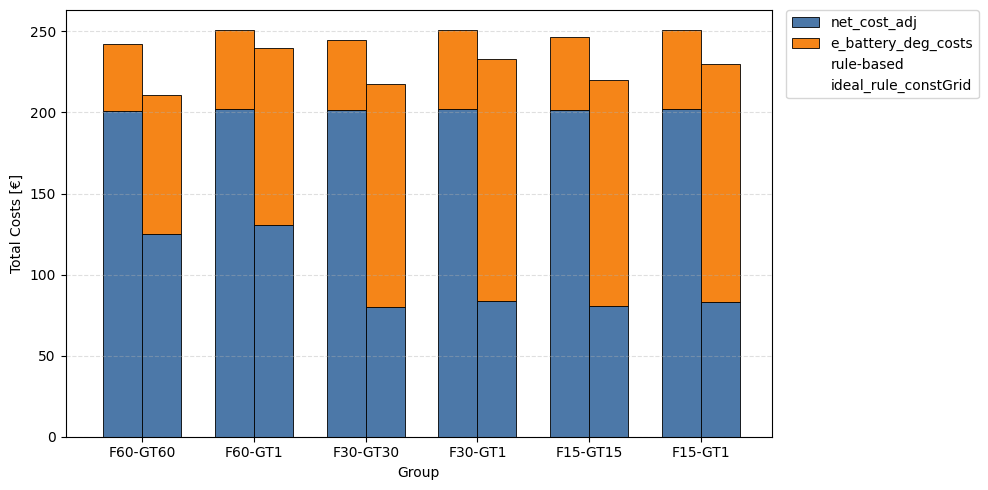

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_stacked_costs(
    dfs,
    group_labels=None,
    models=("rule-based", "ideal"),
    bottom_col="net_cost_adj",
    top_col="e_battery_deg_costs",
    figsize=(10, 5)
):
    """
    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per group (e.g., 6 of them).
        Each DF must contain the two cost columns and identify rows for the two models.
        Either:
          - index contains the model names (e.g. df.index = ["ideal", "rule-based", ...]), or
          - there is a column named "model" with those names.
    group_labels : list[str] | None
        Labels for each dataframe/group on the x-axis. If None, uses 1..N.
    models : tuple[str, str]
        The two models to pull from each DF (order = left-to-right within a group).
    bottom_col : str
        Name of the bottom (base) bar segment (e.g., 'net_cost_adj').
    top_col : str
        Name of the top (stacked) bar segment (e.g., 'e_battery_deg_costs').
    """
    n_groups = len(dfs)
    if group_labels is None:
        group_labels = [f"G{i+1}" for i in range(n_groups)]
    assert len(group_labels) == n_groups, "group_labels length must match dfs length"

    # X positions: one center per group
    x = np.arange(n_groups, dtype=float)

    # Two bars per group ⇒ set a bar width and offset them left/right
    width = 0.35
    offsets = (-width/2, width/2)  # ideal on the left, rule-based on the right

    # Colors for segments
    bottom_color = "#4C78A8"  # net_cost_adj
    top_color    = "#F58518"  # e_battery_deg_costs

    fig, ax = plt.subplots(figsize=figsize)

    # For legend handles (plot once)
    plotted_bottom = False
    plotted_top = False

    for gi, df in enumerate(dfs):
        # Make sure we can access by model name
        if "model" in df.columns:
            df_use = df.set_index("model")
        else:
            df_use = df

        for mi, model in enumerate(models):
            if model == 'ideal_rule_constGrid' and model not in df_use.index:
                model = 'ideal'  # fallback for gt-freq=mpc-freq
            
            if model not in df_use.index:
                raise KeyError(f"Model '{model}' not found in dataframe #{gi} (index).")

            btm = float(df_use.loc[model, bottom_col])
            top = float(df_use.loc[model, top_col])

            xpos = x[gi] + offsets[mi]

            # Bottom segment
            ax.bar(
                xpos, btm, width,
                color=bottom_color,
                label=bottom_col if not plotted_bottom else None,
                edgecolor="black", linewidth=0.6
            )
            # Top segment, stacked on bottom
            ax.bar(
                xpos, top, width,
                bottom=btm,
                color=top_color,
                label=top_col if not plotted_top else None,
                edgecolor="black", linewidth=0.6
            )

            plotted_bottom = True
            plotted_top = True

    # X-axis ticks & labels
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels)

    # Add a small split in the label so they don’t collide visually
    ax.set_xlabel("Group")
    ax.set_ylabel("Total Costs [€]")
    #ax.set_title("Net Cost = net_cost_adj + e_battery_deg_costs (per model & group)")
    ax.grid(axis="y", linestyle="--", alpha=0.4)

    # Build a legend: also show a legend for the two models (as handles)
    # We add dummy (invisible) scatter points just to get model labels in legend cleanly.
    model_handles = []
    for mi, model in enumerate(models):
        model_handles.append(
            ax.bar(0, 0, color="none", edgecolor="none", label=model)  # invisible handle
        )

    # Get segment handles (first two from plotted bars) and combine with model handles
    handles, labels = ax.get_legend_handles_labels()
    # de-duplicate while preserving order
    seen = set()
    uniq = [(h, l) for h, l in zip(handles, labels) if (l not in seen and not seen.add(l))]

    ax.legend([h for h, _ in uniq], [l for _, l in uniq],
              loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)

    plt.tight_layout()
    #plt.ylim(bottom=200)
    return fig, ax

# -----------------------
# Example usage:
# Suppose you have six dataframes df1..df6 where each has rows for 'ideal' and 'rule-based'
# and columns: 'net_cost_final', 'net_cost_adj', 'e_battery_deg_costs'.
fig, ax = plot_grouped_stacked_costs(
    [mref60_gt60_c8.leaderboard_mean(), mref60_gt1_c8.leaderboard_mean(), mref30_gt30_c8.leaderboard_mean(), mref30_gt1_c8.leaderboard_mean(), mref15_gt15_c8.leaderboard_mean(), mref15_gt1_c8.leaderboard_mean()],
    group_labels=["F60-GT60", "F60-GT1", "F30-GT30", "F30-GT1", "F15-GT15", "F15-GT1"],
    models=["rule-based", "ideal_rule_constGrid"],

)
plt.show()


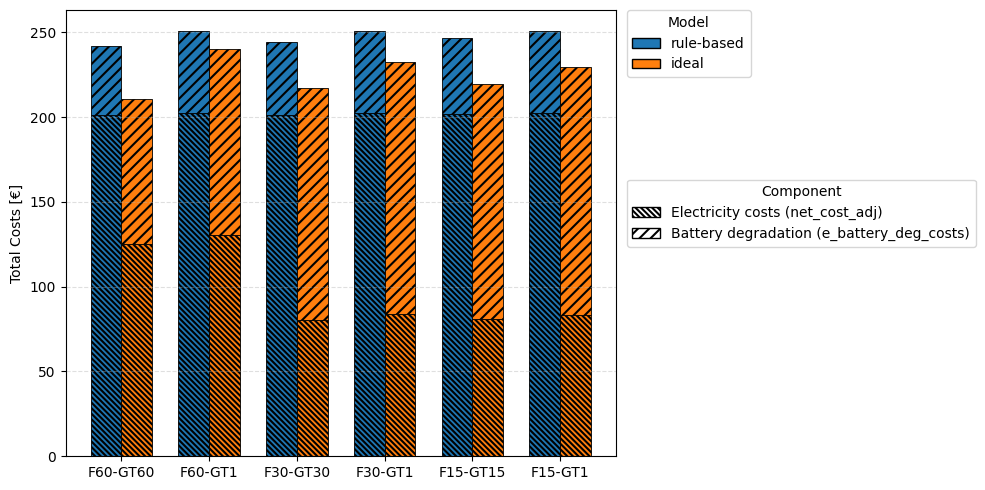

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_grouped_stacked_costs_pretty(
    dfs,
    group_labels=None,
    models=("rule-based", "ideal"),
    bottom_col="net_cost_adj",       # electricity costs
    top_col="e_battery_deg_costs",   # degradation costs
    figsize=(10, 5)
):
    """
    Grouped (per df) + stacked (per bar) bar plot:
      - color encodes model (RBC vs MPC)
      - hatch encodes cost component (electricity vs degradation)
    """
    # --- appearance tweaks ---
    plt.rcParams['hatch.linewidth'] = 1.5  # make hatches visible

    # colors by model  (extend as needed)
    model_colors = {
        "rule-based": "#1f77b4",            # RBC
        "ideal": "#ff7f0e",                 # MPC
        "ideal_rule_constGrid": "#ff7f0e",  # treat same as MPC color
    }

    # hatches by component
    hatch_bottom = r"\\\\\\"   # electricity costs (net_cost_adj)
    hatch_top    = r"///"    # battery degradation (e_battery_deg_costs)

    # --- layout ---
    n_groups = len(dfs)
    if group_labels is None:
        group_labels = [f"G{i+1}" for i in range(n_groups)]
    assert len(group_labels) == n_groups, "group_labels length must match dfs length"

    x = np.arange(n_groups, dtype=float)
    width = 0.35
    offsets = (-width/2, width/2)  # left/right bar in each group

    fig, ax = plt.subplots(figsize=figsize)

    for gi, df in enumerate(dfs):
        df_use = df.set_index("model") if "model" in df.columns else df
        for mi, model in enumerate(models):
            # fallback if your DF uses 'ideal' instead of 'ideal_rule_constGrid'
            m = model
            if m == 'ideal_rule_constGrid' and m not in df_use.index:
                m = 'ideal'
            if m not in df_use.index:
                raise KeyError(f"Model '{model}' not in dataframe #{gi}.")

            btm = float(df_use.loc[m, bottom_col])  # electricity
            top = float(df_use.loc[m, top_col])     # degradation
            xpos = x[gi] + offsets[mi]

            face = model_colors.get(m, "#777777")

            # bottom segment: electricity costs
            ax.bar(
                xpos, btm, width,
                color=face,
                edgecolor='black',
                linewidth=0.6,
                hatch=hatch_bottom,
            )
            # top segment: degradation costs (stacked)
            ax.bar(
                xpos, top, width,
                bottom=btm,
                color=face,
                edgecolor='black',
                linewidth=0.6,
                hatch=hatch_top,
            )

    # axes
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels)
    #ax.set_xlabel("Group")
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.4)

    # --- legends ---
    # 1) models (colors)
    model_handles = []
    seen_models = set()
    for m in models:
        key = 'ideal' if (m == 'ideal_rule_constGrid') else m
        if key not in seen_models:
            model_handles.append(Patch(facecolor=model_colors[key], edgecolor='black', label=key))
            seen_models.add(key)

    # 2) components (hatches)
    comp_handles = [
        Patch(facecolor='white', edgecolor='black', hatch=hatch_bottom, label="Electricity costs (net_cost_adj)"),
        Patch(facecolor='white', edgecolor='black', hatch=hatch_top,    label="Battery degradation (e_battery_deg_costs)"),
    ]

    # put both legends on the right, stacked
    leg1 = ax.legend(handles=model_handles, title="Model", loc="upper left",
                     bbox_to_anchor=(1.02, 1.00), borderaxespad=0)
    ax.add_artist(leg1)
    ax.legend(handles=comp_handles, title="Component", loc="upper left",
              bbox_to_anchor=(1.02, 0.62), borderaxespad=0)

    plt.tight_layout()
    return fig, ax
fig, ax = plot_grouped_stacked_costs_pretty(
    [
        mref60_gt60_c8.leaderboard_mean(),
        mref60_gt1_c8.leaderboard_mean(),
        mref30_gt30_c8.leaderboard_mean(),
        mref30_gt1_c8.leaderboard_mean(),
        mref15_gt15_c8.leaderboard_mean(),
        mref15_gt1_c8.leaderboard_mean(),
    ],
    group_labels=["F60-GT60", "F60-GT1", "F30-GT30", "F30-GT1", "F15-GT15", "F15-GT1"],
    models=("rule-based", "ideal_rule_constGrid"),
)
plt.show()

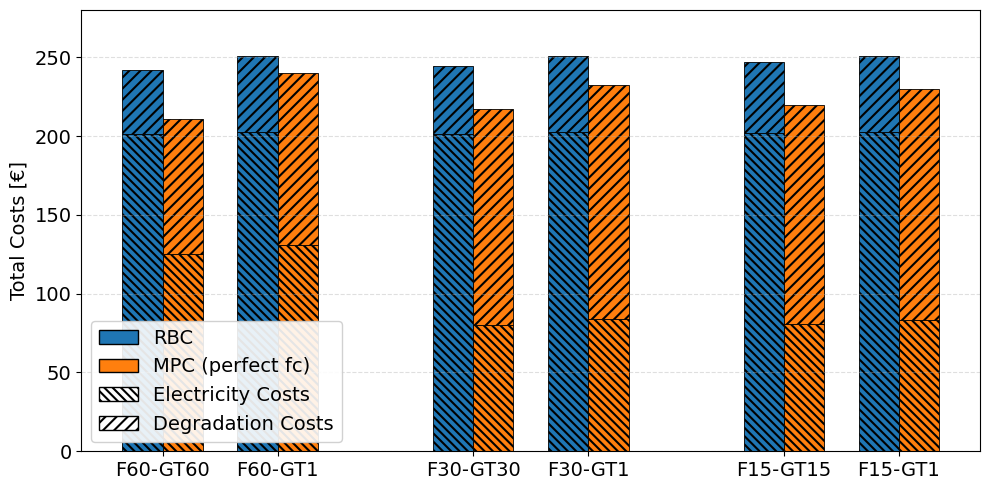

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_grouped_stacked_costs_pretty(
    dfs,
    group_labels=None,
    models=("rule-based", "ideal_rule_constGrid"),
    bottom_col="net_cost_adj",       # Electricity costs
    top_col="e_battery_deg_costs",   # Degradation costs
    figsize=(10, 5),
    gap_after_every=2,               # add space after each pair of bars
    gap_size=0.7,                    # how much extra space to add
):
    """
    Grouped (6) x stacked (2 components) bar chart.
    - Color encodes model (RBC vs MPC)
    - Hatch encodes component (Electricity vs Degradation)
    - One legend (RBC, MPC, Electricity Costs, Degradation Costs)
    - Extra spacing after every 'gap_after_every' bars (default=2) to form 3 visual groups.
    """
    fontsize=14
    plt.rcParams.update({
        "axes.titlesize": fontsize,
        "axes.labelsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fontsize": fontsize,
    })
    # colors by model
    model_colors = {
        "rule-based": "#1f76b4",            # RBC
        "ideal": "#ff7f0e",                 # MPC
        "ideal_rule_constGrid": "#ff7f0e",
    }

    # hatches by component
    hatch_bottom = r"\\\\"   # Electricity
    hatch_top    = r"///"    # Degradation
    plt.rcParams["hatch.linewidth"] = 1.5

    n_groups = len(dfs)
    if group_labels is None:
        group_labels = [f"G{i+1}" for i in range(n_groups)]
    assert len(group_labels) == n_groups, "group_labels length must match dfs length"

    # base x positions 0..N-1, then add gaps after every 'gap_after_every' bars
    base = np.arange(n_groups, dtype=float)
    extra = np.floor_divide(base, gap_after_every) * gap_size
    x = base + extra

    width = 0.35
    offsets = (-width/2, width/2)  # left/right bar within each small pair

    fig, ax = plt.subplots(figsize=figsize)

    for i, df in enumerate(dfs):
        df_use = df.set_index("model") if "model" in df.columns else df
        for j, model in enumerate(models):
            m = model
            if m == "ideal_rule_constGrid" and m not in df_use.index:
                m = "ideal"
            if m not in df_use.index:
                raise KeyError(f"Model '{model}' not found in dataframe #{i}.")

            btm = float(df_use.loc[m, bottom_col])  # electricity
            top = float(df_use.loc[m, top_col])     # degradation
            xpos = x[i] + offsets[j]
            face = model_colors.get(m, "#777777")

            # bottom: electricity
            ax.bar(
                xpos, btm, width,
                color=face, edgecolor="black", linewidth=0.6, hatch=hatch_bottom
            )
            # top: degradation
            ax.bar(
                xpos, top, width,
                bottom=btm, color=face, edgecolor="black", linewidth=0.6, hatch=hatch_top
            )

    # ticks/labels
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels, rotation=0)
    #ax.set_xlabel("Group")
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.4)

    # ---- single legend (RBC, MPC, Electricity Costs, Degradation Costs) ----
    # proxies for models (color)
    h_rbc = Patch(facecolor=model_colors["rule-based"], edgecolor="black", label="RBC")
    h_mpc = Patch(facecolor=model_colors["ideal"],      edgecolor="black", label="MPC (perfect fc)")
    # proxies for components (hatch)
    h_elec = Patch(facecolor="white", edgecolor="black", hatch=hatch_bottom, label="Electricity Costs")
    h_deg  = Patch(facecolor="white", edgecolor="black", hatch=hatch_top,    label="Degradation Costs")

    # ax.legend(
    #     handles=[h_rbc, h_mpc, h_elec, h_deg],
    #     loc="upper left",            # inside the axes
    #     bbox_to_anchor=(0.02, 0.98),
    #     frameon=True
    # )
    ax.legend(handles=[h_rbc, h_mpc, h_elec, h_deg], loc="lower left", framealpha=0.9)
    plt.ylim(bottom=0, top=280)
    fontsize=12



    plt.tight_layout()
    return fig, ax

fig, ax = plot_grouped_stacked_costs_pretty(
    [
        mref60_gt60_c8.leaderboard_mean(),
        mref60_gt1_c8.leaderboard_mean(),
        mref30_gt30_c8.leaderboard_mean(),
        mref30_gt1_c8.leaderboard_mean(),
        mref15_gt15_c8.leaderboard_mean(),
        mref15_gt1_c8.leaderboard_mean(),
    ],
    group_labels=["F60-GT60", "F60-GT1", "F30-GT30", "F30-GT1", "F15-GT15", "F15-GT1"],
)
#plt.savefig("total-costs2.pdf", bbox_inches='tight')
plt.show()



In [20]:
# create a dataframe that contains the mean values of all 6 experiments
#   
# 
summary_df = pd.concat([
    mref60_gt60_c8.leaderboard_mean().assign(experiment='f60-gt60-c8'),
    mref60_gt1_c8.leaderboard_mean().assign(experiment='f60-gt1-c8'),
    mref30_gt30_c8.leaderboard_mean().assign(experiment='f30-gt30-c8'),
    mref30_gt1_c8.leaderboard_mean().assign(experiment='f30-gt1-c8'),
    mref15_gt15_c8.leaderboard_mean().assign(experiment='f15-gt15-c8'),
    mref15_gt1_c8.leaderboard_mean().assign(experiment='f15-gt1-c8'),
], axis=0)
summary_df = summary_df.set_index('experiment')

summary_df.to_csv("summary_costs_c8.csv")

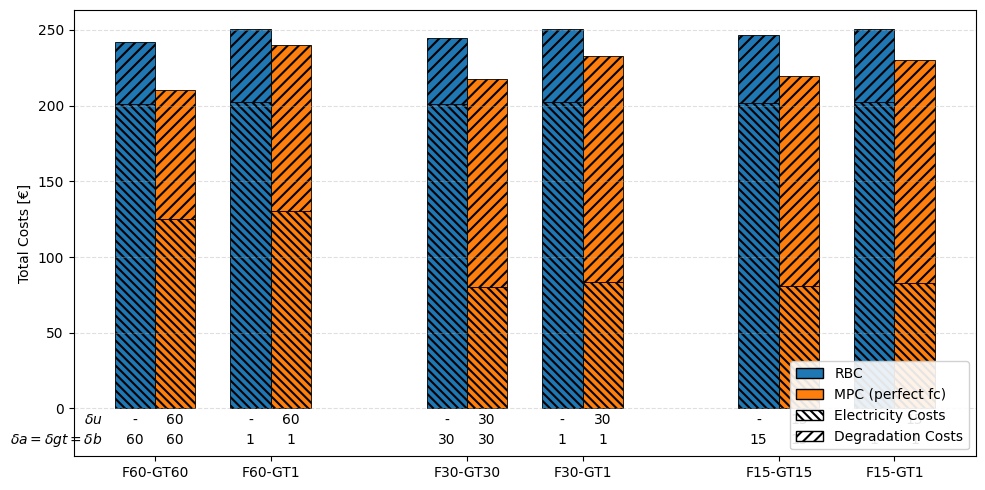

In [55]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_grouped_stacked_costs_pretty(
    dfs,
    group_labels=None,
    models=("rule-based", "ideal_rule_constGrid"),
    bottom_col="net_cost_adj",       # Electricity costs
    top_col="e_battery_deg_costs",   # Degradation costs
    figsize=(10, 5),
    gap_after_every=2,               # add space after each pair of bars
    gap_size=0.7,                    # how much extra space to add
):
    """
    Grouped (6) x stacked (2 components) bar chart.
    - Color encodes model (RBC vs MPC)
    - Hatch encodes component (Electricity vs Degradation)
    - One legend (RBC, MPC, Electricity Costs, Degradation Costs)
    - Extra spacing after every 'gap_after_every' bars (default=2) to form 3 visual groups.
    - Two-row 'mini table' under each bar with δu and δa=δgt=δb.
    """
    # colors by model
    model_colors = {
        "rule-based": "#1f77b4",            # RBC
        "ideal": "#ff7f0e",                 # MPC
        "ideal_rule_constGrid": "#ff7f0e",
    }

    # hatches by component
    hatch_bottom = r"\\\\"   # Electricity
    hatch_top    = r"///"    # Degradation
    plt.rcParams["hatch.linewidth"] = 1.5

    n_groups = len(dfs)
    if group_labels is None:
        group_labels = [f"G{i+1}" for i in range(n_groups)]
    assert len(group_labels) == n_groups, "group_labels length must match dfs length"

    # base x positions 0..N-1, then add gaps after every 'gap_after_every' bars
    base = np.arange(n_groups, dtype=float)
    extra = np.floor_divide(base, gap_after_every) * gap_size
    x = base + extra

    width = 0.35
    offsets = (-width/2, width/2)  # left/right bar within each small pair

    fig, ax = plt.subplots(figsize=figsize)

    # keep x positions of each individual bar in order (for annotation)
    bar_xpos = []
    bar_models = []

    for i, df in enumerate(dfs):
        df_use = df.set_index("model") if "model" in df.columns else df
        for j, model in enumerate(models):
            m = model
            if m == "ideal_rule_constGrid" and m not in df_use.index:
                m = "ideal"
            if m not in df_use.index:
                raise KeyError(f"Model '{model}' not found in dataframe #{i}.")

            btm = float(df_use.loc[m, bottom_col])  # electricity
            top = float(df_use.loc[m, top_col])     # degradation
            xpos = x[i] + offsets[j]
            face = model_colors.get(m, "#777777")

            # bottom: electricity
            ax.bar(
                xpos, btm, width,
                color=face, edgecolor="black", linewidth=0.6, hatch=hatch_bottom
            )
            # top: degradation
            ax.bar(
                xpos, top, width,
                bottom=btm, color=face, edgecolor="black", linewidth=0.6, hatch=hatch_top
            )

            bar_xpos.append(xpos)
            bar_models.append(m)

    # ticks/labels
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels, rotation=0)
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.4)

    # ---- single legend (RBC, MPC, Electricity Costs, Degradation Costs) ----
    h_rbc = Patch(facecolor=model_colors["rule-based"], edgecolor="black", label="RBC")
    h_mpc = Patch(facecolor=model_colors["ideal"],      edgecolor="black", label="MPC (perfect fc)")
    h_elec = Patch(facecolor="white", edgecolor="black", hatch=hatch_bottom, label="Electricity Costs")
    h_deg  = Patch(facecolor="white", edgecolor="black", hatch=hatch_top,    label="Degradation Costs")
    ax.legend(handles=[h_rbc, h_mpc, h_elec, h_deg], loc="lower right", framealpha=0.9)

    # Make a bit of room at the bottom for the mini-table text
    ymin, ymax = ax.get_ylim()
    rng = ymax - ymin
    ax.set_ylim(ymin - 0.12 * rng, ymax)  # ~12% extra space below

    # ---------- mini-table under each bar ----------
    # We parse group labels like "F60-GT60" to extract F and GT numbers.
    f_gt = []
    pattern = re.compile(r"F(\d+)-GT(\d+)")
    for lab in group_labels:
        m = pattern.match(lab.replace(" ", ""))
        if not m:
            f_val = ""
            gt_val = ""
        else:
            f_val = m.group(1)    # e.g., "60"
            gt_val = m.group(2)   # e.g., "60" or "1"
        f_gt.append((f_val, gt_val))

    # y positions for the two rows under the baseline
    y_row1 = ymin - 0.03 * rng  # row for δu
    y_row2 = ymin - 0.08 * rng  # row for δa=δgt=δb

    # Left-side row names (draw once near the first group)
    x_left_label = x[0] - width * 1.3
    ax.text(x_left_label, y_row1, r"$\delta u$", ha="right", va="center")
    ax.text(x_left_label, y_row2, r"$\delta a=\delta gt=\delta b$", ha="right", va="center")

    # For each bar, compute its values and draw
    # Order of bars is RBC then MPC per group because of 'models' order.
    for gi in range(n_groups):
        F, GT = f_gt[gi]
        # RBC bar (first offset)
        xpos_rbc = x[gi] + offsets[0]
        # MPC bar (second offset)
        xpos_mpc = x[gi] + offsets[1]

        # Row 1 (δu): '-' for RBC, 'F' for MPC
        ax.text(xpos_rbc, y_row1, "-" if F != "" else "", ha="center", va="center")
        ax.text(xpos_mpc, y_row1, F,                  ha="center", va="center")

        # Row 2 (δa=δgt=δb): GT for both
        ax.text(xpos_rbc, y_row2, GT, ha="center", va="center")
        ax.text(xpos_mpc, y_row2, GT, ha="center", va="center")
    # -----------------------------------------------

    plt.tight_layout()
    return fig, ax
fig, ax = plot_grouped_stacked_costs_pretty(
    [
        mref60_gt60_c8.leaderboard_mean(),
        mref60_gt1_c8.leaderboard_mean(),
        mref30_gt30_c8.leaderboard_mean(),
        mref30_gt1_c8.leaderboard_mean(),
        mref15_gt15_c8.leaderboard_mean(),
        mref15_gt1_c8.leaderboard_mean(),
    ],
    group_labels=["F60-GT60", "F60-GT1", "F30-GT30", "F30-GT1", "F15-GT15", "F15-GT1"],
)
plt.show()

<Axes: title={'center': 'OVERSTATEMENTS'}, ylabel='Value [€]'>

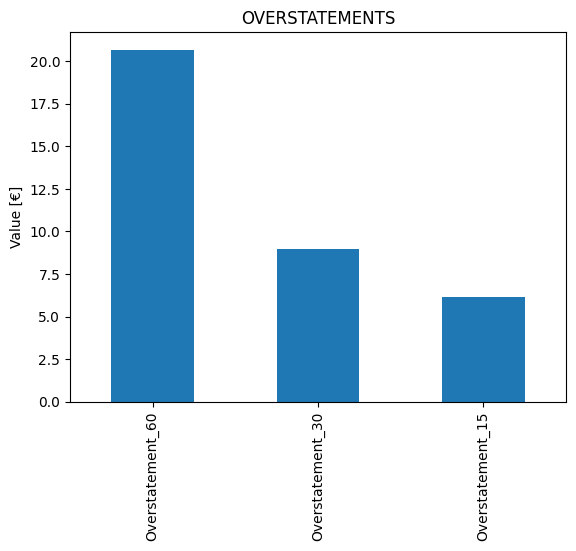

In [26]:
comparison_df[['Overstatement_60', 'Overstatement_30', 'Overstatement_15']].mean().plot(kind='bar', title='OVERSTATEMENTS', ylabel='Value [€]')

Text(0, 0.5, 'Shrinkage [%]')

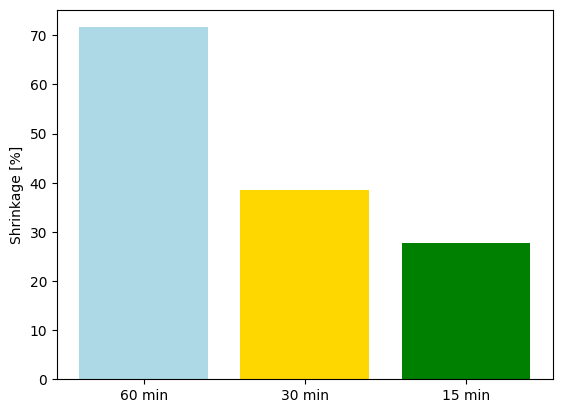

In [27]:
#comparison_df[['shrinkage_60', 'shrinkage_30', 'shrinkage_15']].mean().plot(kind='bar', title='SHRINKAGE', ylabel='Value [-]')
comparison_df[['shrinkage_60', 'shrinkage_30', 'shrinkage_15']].mean()

import matplotlib.pyplot as plt

# make a bar plot of shrinkage using matplotlib
plt.figure()
bars = plt.bar(['60 min', '30 min', '15 min'], comparison_df[['shrinkage_60', 'shrinkage_30', 'shrinkage_15']].mean()*100,
               color=['lightblue', 'gold', 'green'])
plt.ylabel('Shrinkage [%]')


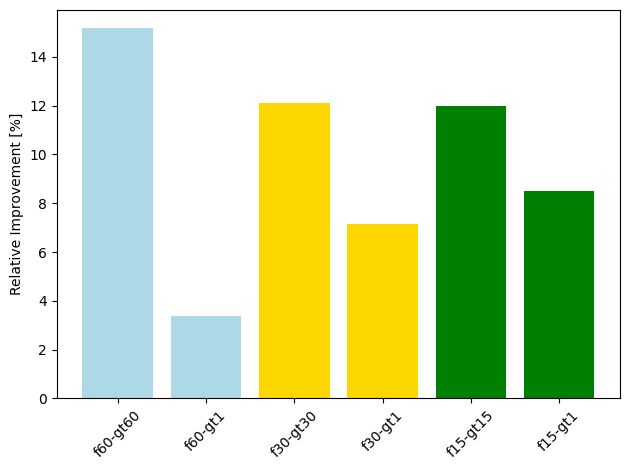

In [28]:
#comparison_df[['rel_gt60_improv_60', 'rel_gt1_improv_60', 'rel_gt30_improv_30', 'rel_gt1_improv_30', 'rel_gt15_improv_15', 'rel_gt1_improv_15', 'rel_improv_diff_60', 'rel_improv_diff_30', 'rel_improv_diff_15']].mean().plot(kind='bar', title='RELATIVE IMPROVEMENTS', ylabel='Value [-]')
comparison_df[['rel_gt60_improv_60', 'rel_gt1_improv_60', 'rel_gt30_improv_30', 'rel_gt1_improv_30', 'rel_gt15_improv_15', 'rel_gt1_improv_15']].mean()#.plot(kind='bar', title='RELATIVE IMPROVEMENTS', ylabel='Value [-]')

plt.figure()
bars = plt.bar(
    ['f60-gt60', 'f60-gt1', 'f30-gt30', 'f30-gt1', 'f15-gt15', 'f15-gt1'],
    comparison_df[['rel_gt60_improv_60', 'rel_gt1_improv_60', 'rel_gt30_improv_30', 'rel_gt1_improv_30', 'rel_gt15_improv_15', 'rel_gt1_improv_15']].mean()*100,
    color=['lightblue', 'lightblue', 'gold', 'gold', 'green', 'green']
)
plt.ylabel('Relative Improvement [%]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
comparison_df.mean()

diff_f60-gt60-c8      31.314069
diff_f60-gt1-c8       10.644530
diff_f30-gt30-c8      26.972952
diff_f30-gt1-c8       17.985074
diff_f15-gt15-c8      26.967554
diff_f15-gt1-c8       20.795656
Overstatement_60      20.669539
Overstatement_30       8.987878
Overstatement_15       6.171898
shrinkage_60           0.716272
shrinkage_30           0.385248
shrinkage_15           0.277759
rel_gt60_improv_60     0.151661
rel_gt1_improv_60      0.033583
rel_gt30_improv_30     0.121273
rel_gt1_improv_30      0.071473
rel_gt15_improv_15     0.119816
rel_gt1_improv_15      0.085133
rel_improv_diff_60     0.118078
rel_improv_diff_30     0.049800
rel_improv_diff_15     0.034683
dtype: float64

In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import hashlib

def _stable_jitter(label: str, scale: float = 0.18) -> float:
    """Deterministic jitter in [-scale, +scale] based on a string label."""
    h = hashlib.md5(label.encode()).hexdigest()
    u = int(h[:8], 16) / 0xFFFFFFFF  # uniform in [0,1]
    return (u - 0.5) * 2 * scale

def plot_shrinkage_by_experiment(df: pd.DataFrame,
                                 experiments=(60, 30, 15),
                                 jitter=0.18,
                                 show_summary=True,
                                 summary_stat="median"):
    """
    Scatter: x = experiment category (60/30/15), y = shrinkage a = 1 - s.
    Colors = buildings. Deterministic horizontal jitter to avoid overlap.
    """
    df_ = df.reset_index().rename(columns={df.index.name or 'index': 'building'})

    rows = []
    order = []
    for i, e in enumerate(experiments):
        col = f'shrinkage_{e}'
        if col not in df_.columns:
            continue
        order.append(e)
        base = float(i)
        for _, r in df_.iterrows():
            val = r[col]
            if pd.isna(val):
                continue
            rows.append({
                "x": base ,#+ _stable_jitter(f"{r['building']}|{e}", scale=jitter),
                "x_base": base,
                "experiment": f"{e}-min",
                "building": r["building"],
                "shrinkage": float(val),
            })

    long_df = pd.DataFrame(rows)
    if long_df.empty:
        raise ValueError("No shrinkage_* columns found for the given experiments.")

    fig = px.scatter(
        long_df,
        x="x", y="shrinkage",
        color="building",
        hover_data={"building": True, "experiment": True, "shrinkage": ":.3f", "x": False, "x_base": False},
        title="Shrinkage of each building/experiment pair",
        labels={"shrinkage": "Shrinkage", "x": "Experiment"},
    )
    fig.update_traces(marker={"size": 10, "opacity": 0.9})

    # Put category ticks at 0,1,2… with labels 60/30/15
    tickvals = [float(i) for i, _ in enumerate(order)]
    ticktext = [f"{e}-min" for e in order]
    fig.update_xaxes(tickvals=tickvals, ticktext=ticktext, range=[-0.6, len(tickvals) - 0.4])

    # Reference lines
    fig.add_hline(y=1, line_dash="dot")  # full evaporation / reversal
    fig.add_hline(y=0, line_dash="dot")  # no shrinkage

    # Optional summary (median/mean) per experiment
    if show_summary:
        if summary_stat == "median":
            agg = long_df.groupby("x_base")["shrinkage"].median()
            label = "Median shrinkage"
        else:
            agg = long_df.groupby("x_base")["shrinkage"].mean()
            label = "Mean shrinkage"
        fig.add_trace(go.Scatter(
            x=agg.index, y=agg.values,
            mode="markers",
            marker=dict(symbol="x", size=14, line=dict(width=2), color="black"),
            name=label,
            hovertemplate=f"{label}: %{{y:.3f}}<extra></extra>"  # <-- escaped braces
        ))

    fig.update_layout(legend_title_text="Building", margin=dict(l=60, r=20, t=60, b=50), width=800, height=500)
    return fig, long_df

# usage:
fig, tidy = plot_shrinkage_by_experiment(comparison_df, summary_stat="mean")
fig.show()


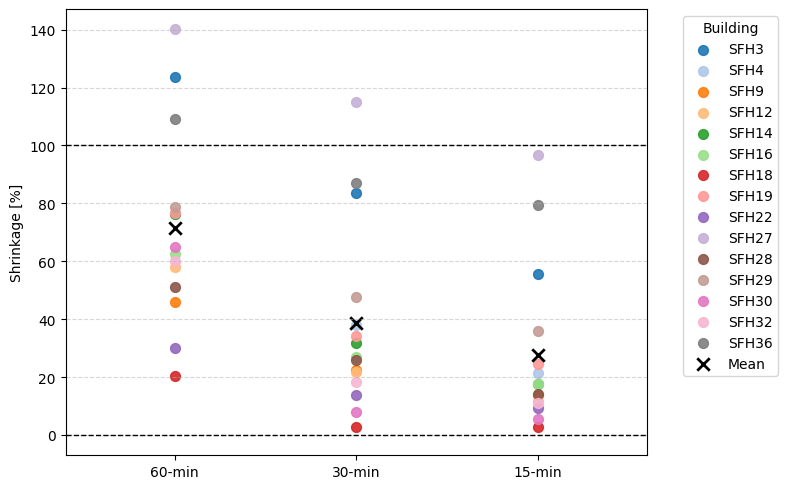

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hashlib

def _stable_jitter(label: str, scale: float = 0.18) -> float:
    """Deterministic jitter in [-scale, +scale] based on a string label."""
    h = hashlib.md5(label.encode()).hexdigest()
    u = int(h[:8], 16) / 0xFFFFFFFF
    return (u - 0.5) * 2 * scale

def plot_shrinkage_by_experiment_matplotlib(df: pd.DataFrame,
                                            experiments=(60, 30, 15),
                                            jitter=0.18,
                                            show_summary=True,
                                            summary_stat="median"):
    """
    Matplotlib version: scatter plot of shrinkage vs experiment.
    """
    df_ = df.reset_index().rename(columns={df.index.name or 'index': 'building'})
    rows, order = [], []

    for i, e in enumerate(experiments):
        col = f'shrinkage_{e}'
        if col not in df_.columns:
            continue
        order.append(e)
        base = float(i)
        for _, r in df_.iterrows():
            val = r[col] * 100
            if pd.isna(val):
                continue
            rows.append({
                "x": base ,#+ _stable_jitter(f"{r['building']}|{e}", scale=jitter),
                "x_base": base,
                "experiment": f"{e}-min",
                "building": r["building"],
                "shrinkage": float(val),
            })

    long_df = pd.DataFrame(rows)
    if long_df.empty:
        raise ValueError("No shrinkage_* columns found for the given experiments.")

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(8, 5))

    # Pick a color per building
    buildings = long_df['building'].unique()
    cmap = plt.get_cmap("tab20")
    colors = {b: cmap(i % 20) for i, b in enumerate(buildings)}

    # Scatter for each building
    for b in buildings:
        df_b = long_df[long_df['building'] == b]
        ax.scatter(df_b["x"], df_b["shrinkage"], label=b, color=colors[b], alpha=0.9, s=50)

    # Reference lines
    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.axhline(100, color="black", linestyle="--", linewidth=1)

    # Optional summary
    if show_summary:
        if summary_stat == "median":
            agg = long_df.groupby("x_base")["shrinkage"].median()
            label = "Median"
        else:
            agg = long_df.groupby("x_base")["shrinkage"].mean()
            label = "Mean"
        ax.scatter(agg.index, agg.values,
                   marker="x", color="black", s=80, linewidths=2, label=label)

    # Formatting
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels([f"{e}-min" for e in order])
    ax.set_xlim(-0.6, len(order)-0.4)
    ax.set_ylabel("Shrinkage [%]")
    #ax.set_xlabel("Experiment")
    #ax.set_title("Shrinkage of each building/experiment pair")
    ax.legend(title="Building", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    plt.tight_layout()
    return fig, long_df


# --- Usage example ---
fig, tidy = plot_shrinkage_by_experiment_matplotlib(comparison_df, summary_stat="mean")
plt.show()


In [31]:
import pandas as pd
import plotly.express as px

def plot_shrinkage_vs_rel_improv(df: pd.DataFrame,
                                 experiments=(60, 30, 15),
                                 rel_fmt='rel_gt{e}_improv_{e}',
                                 shrink_fmt='shrinkage_{e}',
                                 compare_to_gt1=False):
    """
    df: DataFrame indexed by 'building' with columns like
        shrinkage_60, rel_gt60_improv_60, etc.
    experiments: which experiments to include (e.g., 60, 30, 15).
    rel_fmt / shrink_fmt: format strings for column names.
    """
    df_ = df.reset_index()  # bring 'building' out of index
    if compare_to_gt1:
        rel_fmt = 'rel_gt1_improv_{e}' #rel_fmt.replace('gt', 'gt1_')
        
    parts = []
    for e in experiments:
        rel_col = rel_fmt.format(e=e)
        shr_col = shrink_fmt.format(e=e)
        if rel_col not in df_.columns or shr_col not in df_.columns:
            # skip quietly if a column is missing
            continue
        tmp = df_[['building', shr_col, rel_col]].copy()
        tmp.columns = ['building', 'shrinkage', 'rel_improv']
        tmp['experiment'] = f'{e}-min'
        parts.append(tmp)

    long_df = pd.concat(parts, ignore_index=True)
    long_df = long_df.dropna(subset=['shrinkage', 'rel_improv'])

    fig = px.scatter(
        long_df,
        x='shrinkage',               # a = 1 - s
        y='rel_improv',              # % savings vs B
        color='building',            # each building its own color
        symbol='experiment',         # symbol encodes experiment
        hover_data={
            'building': True,
            'experiment': True,
            'shrinkage': ':.3f',
            'rel_improv': ':.3%'     # show as %
        },
        labels={
            'shrinkage': 'Shrinkage (percentage of predicted edge that vanishes)',
            'rel_improv': 'Relative improvement of A vs B (share of B’s bill)'
        },
        title='Shrinkage vs Relative Improvement per Building and Experiment'
    )

    # Styling
    fig.update_traces(marker={'size': 10, 'opacity': 0.85})
    fig.update_yaxes(tickformat='.1%')       # percent ticks
    fig.add_vline(x=0, line_dash='dot')      # no attenuation
    fig.add_vline(x=1, line_dash='dot')      # full evaporation / reversal threshold
    fig.update_layout(
        legend_title_text='Building (color) & Experiment (symbol)',
        margin=dict(l=60, r=20, t=60, b=50),
        height=600,
        width=2400
    )
    return fig, long_df

# --- usage ---
fig, tidy = plot_shrinkage_vs_rel_improv(comparison_df, compare_to_gt1=True)  # df = your DataFrame
fig.show()


In [32]:
import pandas as pd
import numpy as np
import plotly.express as px

def plot_shrinkage_vs_true_abs(
    df: pd.DataFrame,
    experiments=(60, 30, 15),
    diff_true_fmt='diff_f{e}-gt1-c8',   # true Δ = B−A under realistic GT
    shrink_fmt='shrinkage_{e}'
):
    """
    Scatter: x = attenuation a = 1−s, y = true absolute improvement Δ_true (in €).
    """
    df_ = df.reset_index()  # bring 'building' out of the index
    parts = []
    for e in experiments:
        ycol = diff_true_fmt.format(e=e)
        xcol = shrink_fmt.format(e=e)
        if ycol not in df_.columns or xcol not in df_.columns:
            continue
        tmp = df_[['building', xcol, ycol]].copy()
        tmp.columns = ['building', 'shrinkage', 'abs_improv']
        tmp['experiment'] = f'{e}-min'
        parts.append(tmp)

    long_df = pd.concat(parts, ignore_index=True).dropna(subset=['shrinkage', 'abs_improv'])

    fig = px.scatter(
        long_df, x='shrinkage', y='abs_improv',
        color='building', symbol='experiment',
        hover_data={'building': True, 'experiment': True, 'shrinkage': ':.3f', 'abs_improv': ':.2f'},
        labels={
            'shrinkage': 'Attenuation a = 1 − s (fraction of predicted edge that vanishes)',
            'abs_improv': 'True absolute improvement Δ_true = (B − A) [€]'
        },
        title='Attenuation vs True Absolute Improvement'
    )
    fig.update_traces(marker={'size': 10, 'opacity': 0.85})
    fig.add_vline(x=0, line_dash='dot')   # no attenuation
    fig.add_vline(x=1, line_dash='dot')   # full evaporation / reversal threshold
    fig.add_hline(y=0, line_dash='dot')   # A not better than B
    fig.update_yaxes(tickprefix='€', separatethousands=True)
    fig.update_layout(legend_title_text='Building (color) & Experiment (symbol)',
                      margin=dict(l=60, r=20, t=60, b=50))
    return fig, long_df

fig1, df1 = plot_shrinkage_vs_true_abs(comparison_df)
fig1.show()

In [33]:
def plot_shrinkage_vs_kept_percent(
    df: pd.DataFrame,
    experiments=(60, 30, 15),
    rel_true_fmt='rel_gt1_improv_{e}',   # % savings in reality
    rel_pred_fmt='rel_gt{e}_improv_{e}', # % savings in typical eval
    shrink_fmt='shrinkage_{e}',
    eps=1e-9
):
    """
    Scatter: x = attenuation a = 1−s, y = k = ρ_true / ρ_pred (share of percent-savings kept).
    """
    df_ = df.reset_index()
    parts = []
    for e in experiments:
        rt = rel_true_fmt.format(e=e)
        rp = rel_pred_fmt.format(e=e)
        xcol = shrink_fmt.format(e=e)
        if not all(c in df_.columns for c in [rt, rp, xcol]):
            continue
        tmp = df_[['building', xcol, rt, rp]].copy()
        tmp['kept_percent'] = np.where(tmp[rp].abs() >= eps, tmp[rt] / tmp[rp], np.nan)
        tmp = tmp[['building', xcol, 'kept_percent']]
        tmp.columns = ['building', 'shrinkage', 'kept_percent']
        tmp['experiment'] = f'{e}-min'
        parts.append(tmp)

    long_df = pd.concat(parts, ignore_index=True).dropna(subset=['shrinkage', 'kept_percent'])

    fig = px.scatter(
        long_df, x='shrinkage', y='kept_percent',
        color='building', symbol='experiment',
        hover_data={'building': True, 'experiment': True, 'shrinkage': ':.3f', 'kept_percent': ':.1%'},
        labels={
            'shrinkage': 'Attenuation a = 1 − s (fraction of predicted edge that vanishes)',
            'kept_percent': 'Kept percent of percent-savings k = ρ_true / ρ_pred'
        },
        title='Attenuation vs Kept Percent of Percent-Savings'
    )
    fig.update_traces(marker={'size': 10, 'opacity': 0.85})
    fig.add_vline(x=0, line_dash='dot')   # no attenuation
    fig.add_vline(x=1, line_dash='dot')   # full evaporation / reversal threshold
    fig.add_hline(y=1, line_dash='dot')   # no drop in percent-savings
    fig.add_hline(y=0, line_dash='dot')   # percent-savings vanish in reality
    fig.update_yaxes(tickformat='.0%')
    fig.update_layout(legend_title_text='Building (color) & Experiment (symbol)',
                      margin=dict(l=60, r=20, t=60, b=50))
    return fig, long_df

fig2, df2 = plot_shrinkage_vs_kept_percent(comparison_df)
fig2.show()

In [34]:
# comparison for individual buildings
print("Difference per building for f60-gt60-c8 vs f60-gt1-c8:")
print(comparison_df[['diff_f60-gt60-c8', 'diff_f60-gt1-c8', 'Overstatement_60']])

print("\n\nDifference per building for f30-gt30-c8 vs f30-gt1-c8:")
print(comparison_df[['diff_f30-gt30-c8', 'diff_f30-gt1-c8', 'Overstatement_30']])

print("\n\nDifference per building for f15-gt15-c8 vs f15-gt1-c8:")
print(comparison_df[['diff_f15-gt15-c8', 'diff_f15-gt1-c8', 'Overstatement_15']])

Difference per building for f60-gt60-c8 vs f60-gt1-c8:
          diff_f60-gt60-c8  diff_f60-gt1-c8  Overstatement_60
building                                                     
SFH3             30.665021        -7.219810         37.884831
SFH4             36.745090         8.663603         28.081487
SFH9             58.360213        31.632888         26.727324
SFH12            29.980272        12.560195         17.420077
SFH14            31.176752         7.383898         23.792854
SFH16            29.708213        11.133877         18.574336
SFH18            30.570487        24.294706          6.275781
SFH19            25.861591         5.989763         19.871827
SFH22            43.329507        30.351821         12.977686
SFH27            12.842192        -5.154658         17.996850
SFH28            44.773936        21.829775         22.944160
SFH29            20.143329         4.286167         15.857162
SFH30            14.795594         5.196066          9.599529
SFH32          

In [35]:
# diff_60 basically is the Overstatement
# Then implement Realized fraction aka shrinkage. How much does my advantage shrink?
# Then implement Relative Improvement. 
# First take the predicted improvement at same frequency between RB and Ideal-ConstGrid. Second, take the more realistic improvement between RB and Ideal-ConstGrid at GT frequency = 1min. 

In [36]:
comparison_df

,diff_f60-gt60-c8,diff_f60-gt1-c8,diff_f30-gt30-c8,diff_f30-gt1-c8,diff_f15-gt15-c8,diff_f15-gt1-c8,Overstatement_60,Overstatement_30,Overstatement_15,shrinkage_60,...,shrinkage_15,rel_gt60_improv_60,rel_gt1_improv_60,rel_gt30_improv_30,rel_gt1_improv_30,rel_gt15_improv_15,rel_gt1_improv_15,rel_improv_diff_60,rel_improv_diff_30,rel_improv_diff_15
building,,,,,,,,,,,,,,,,,,,,,
SFH3,30.665021,-7.219810,25.520497,4.195113,24.879469,11.023250,37.884831,21.325384,13.856219,1.235441,...,0.556934,0.184409,-0.041116,0.151129,0.023891,0.144747,0.062776,0.225525,0.127238,0.081970
SFH4,36.745090,8.663603,31.480566,19.490268,31.217903,24.586249,28.081487,11.990297,6.631654,0.764224,...,0.212431,0.162816,0.036886,0.137852,0.082981,0.134985,0.104678,0.125930,0.054870,0.030308
SFH9,58.360213,31.632888,55.631859,43.126586,55.536930,47.870990,26.727324,12.505273,7.665940,0.457972,...,0.138033,0.110763,0.058649,0.104777,0.079958,0.103956,0.088755,0.052114,0.024818,0.015202
SFH12,29.980272,12.560195,27.081867,21.200851,27.086731,23.888448,17.420077,5.881016,3.198283,0.581051,...,0.118076,0.118817,0.047354,0.105426,0.079930,0.103960,0.090063,0.071463,0.025496,0.013898
SFH14,31.176752,7.383898,25.352764,17.253514,25.435709,20.979191,23.792854,8.099250,4.456518,0.763160,...,0.175207,0.232426,0.052152,0.186021,0.121861,0.183763,0.148175,0.180274,0.064161,0.035588
SFH16,29.708213,11.133877,23.913256,17.431970,23.996001,19.802525,18.574336,6.481286,4.193476,0.625226,...,0.174757,0.129441,0.046912,0.103291,0.073449,0.102760,0.083438,0.082529,0.029842,0.019323
SFH18,30.570487,24.294706,28.274138,27.474748,28.342805,27.585778,6.275781,0.799390,0.757027,0.205289,...,0.026710,0.099897,0.076989,0.091642,0.087066,0.091224,0.087418,0.022908,0.004576,0.003806
SFH19,25.861591,5.989763,20.983630,13.820081,21.244485,16.018844,19.871827,7.163550,5.225642,0.768392,...,0.245976,0.259148,0.055789,0.206402,0.128722,0.204538,0.149202,0.203359,0.077680,0.055336
SFH22,43.329507,30.351821,40.958079,35.243017,41.082478,37.311476,12.977686,5.715063,3.771002,0.299512,...,0.091791,0.092563,0.063835,0.087136,0.074122,0.087043,0.078472,0.028728,0.013014,0.008571


In [37]:
diff_f60_gt60_c8['diff']

building
SFH3     30.665021
SFH4     36.745090
SFH9     58.360213
SFH12    29.980272
SFH14    31.176752
SFH16    29.708213
SFH18    30.570487
SFH19    25.861591
SFH22    43.329507
SFH27    12.842192
SFH28    44.773936
SFH29    20.143329
SFH30    14.795594
SFH32    29.202014
SFH36    31.556827
Name: diff, dtype: float64

In [38]:
diff_f60_gt1_c8['diff']

building
SFH3     -7.219810
SFH4      8.663603
SFH9     31.632888
SFH12    12.560195
SFH14     7.383898
SFH16    11.133877
SFH18    24.294706
SFH19     5.989763
SFH22    30.351821
SFH27    -5.154658
SFH28    21.829775
SFH29     4.286167
SFH30     5.196066
SFH32    11.631117
SFH36    -2.911465
Name: diff, dtype: float64

In [39]:
mre.df.columns

Index(['path', 'timestamp', 'model', 'freq', 'building', 't_start', 't_end',
       'total_timespan', 'import_cost', 'export_revenue', 'net_cost',
       'net_cost_adj', 'import_squared', 'export_squared',
       'e_discharged_total', 'battery_deg_costs', 'net_cost_final', 'count',
       'mss_kw2', 'rms_kw', 'q95_abs_kw', 'pmax_import_kw', 'pmax_export_kw',
       'exceed_frac', 'exceed_hours', 'threshold_kw', 'e_end',
       'pg_import_total', 'pg_export_total', 'e_export_total',
       'e_import_total', 'e_throughput', 'e_battery_deg_costs', 'steps',
       'solver_fails', 'solver_fail_count', 'solver_fail_pct',
       'solver_top_errors', 'solver_status_mix'],
      dtype='object')

In [40]:
cols_to_show=["model", "t_start", 'import_squared', 'export_squared', 'count', 'mss_kw2',
       'rms_kw', 'q95_abs_kw', 'pmax_import_kw', 'pmax_export_kw',
       'exceed_frac', 'exceed_hours', 'threshold_kw']

#mre.df[cols_to_show]
mre.leaderboard(by="mss_kw2", cols_to_show=cols_to_show)


🏢 Building: SFH3


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,134061.568723,265388.055770,220306,1.767037,1.329299,3.122414,6.669995,6.261165,0.049885,183.166667,3.122414
1,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,147014.044435,283084.002230,220306,1.896793,1.377241,3.300426,7.369628,5.897717,0.049926,183.316667,3.300426
2,ideal_rule,2020-07-20 04:00:00+00:00,219053.332704,288499.335130,220306,1.956654,1.398804,3.207129,9.078233,6.838311,0.050003,183.600000,3.207129
3,mpc_det_rule,2020-07-20 04:00:00+00:00,241188.204196,294177.416194,220306,2.077695,1.441421,3.246452,10.036072,6.689625,0.050003,183.600000,3.246452
4,ideal,2020-07-20 04:00:00+00:00,288095.476690,342237.952837,220306,2.267640,1.505869,3.333736,8.887746,6.918924,0.050003,183.600000,3.333736
5,rule-based,2020-07-20 04:00:00+00:00,263971.946443,371937.622906,220306,2.456717,1.567392,4.266957,8.350652,6.397265,0.050003,183.600000,4.266957



🏢 Building: SFH4


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,193549.607362,288992.962649,220306,2.145642,1.464801,3.413110,6.052420,6.338566,0.049985,183.533333,3.413110
1,ideal_rule,2020-07-20 04:00:00+00:00,244484.461278,316519.091025,220306,2.292769,1.514189,3.501232,8.789813,6.952912,0.050003,183.600000,3.501232
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,183867.835746,357534.339410,220306,2.399956,1.549179,3.626718,8.134169,6.356957,0.049853,183.050000,3.626718
3,mpc_det_rule,2020-07-20 04:00:00+00:00,254455.584077,359732.207067,220306,2.511688,1.584831,3.565406,9.802575,7.119912,0.050003,183.600000,3.565406
4,rule-based,2020-07-20 04:00:00+00:00,195852.115255,432530.002232,220306,2.570387,1.603243,4.277344,8.144977,7.107643,0.050003,183.600000,4.277344
5,ideal,2020-07-20 04:00:00+00:00,304189.840018,370572.202867,220306,2.610869,1.615818,3.591416,10.041451,7.060066,0.050003,183.600000,3.591416



🏢 Building: SFH9


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,365450.961290,299388.721342,220306,2.951377,1.717957,3.846997,10.984856,6.943101,0.049958,183.433333,3.846997
1,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,374685.965381,349933.374932,220306,3.199220,1.788636,3.923567,11.038475,7.133590,0.049890,183.183333,3.923567
2,ideal_rule,2020-07-20 04:00:00+00:00,433525.051546,353477.366573,220306,3.247988,1.802217,4.143326,10.984856,7.864635,0.050003,183.600000,4.143326
3,rule-based,2020-07-20 04:00:00+00:00,335049.819125,476182.138133,220306,3.386634,1.840281,4.467031,10.984856,8.484696,0.050003,183.600000,4.467031
4,ideal,2020-07-20 04:00:00+00:00,479813.640855,407753.692669,220306,3.491967,1.868680,4.166864,14.142992,7.968981,0.050003,183.600000,4.166864
5,mpc_det_rule,2020-07-20 04:00:00+00:00,469791.167476,384310.954736,220306,3.536711,1.880614,4.239865,14.186291,8.013579,0.050003,183.600000,4.239865



🏢 Building: SFH12


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,116690.089761,105446.178156,220306,0.979713,0.989805,2.436428,6.109779,5.558620,0.049953,183.416667,2.436428
1,ideal_rule,2020-07-20 04:00:00+00:00,145424.457098,105426.980837,220306,1.008156,1.004070,2.432758,8.063375,5.404915,0.050003,183.600000,2.432758
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,120466.783689,127181.615121,220306,1.083269,1.040802,2.438960,7.525620,5.117637,0.050003,183.600000,2.438960
3,rule-based,2020-07-20 04:00:00+00:00,145936.166580,133262.358949,220306,1.093262,1.045592,2.748308,7.525620,4.985782,0.050003,183.600000,2.748308
4,mpc_det_rule,2020-07-20 04:00:00+00:00,172061.661551,118540.373756,220306,1.166509,1.080050,2.574053,8.050487,5.529778,0.050003,183.600000,2.574053
5,ideal,2020-07-20 04:00:00+00:00,217768.204545,167277.750842,220306,1.407142,1.186230,2.657197,8.069364,5.949460,0.050003,183.600000,2.657197



🏢 Building: SFH14


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,121931.151317,321642.349310,220306,1.971805,1.404210,3.339810,6.225881,5.883551,0.049976,183.5,3.339810
1,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,130970.194263,316012.219923,220306,1.987374,1.409743,3.315491,6.225881,6.670110,0.050003,183.6,3.315491
2,ideal_rule,2020-07-20 04:00:00+00:00,157015.011488,338749.927636,220306,2.062479,1.436133,3.353154,6.225881,7.315677,0.050003,183.6,3.353154
3,mpc_det_rule,2020-07-20 04:00:00+00:00,159917.694891,343835.552941,220306,2.090251,1.445770,3.350376,12.007655,7.326414,0.050003,183.6,3.350376
4,rule-based,2020-07-20 04:00:00+00:00,115750.348887,427146.714301,220306,2.264074,1.504684,4.026143,11.043059,6.840115,0.050003,183.6,4.026143
5,ideal,2020-07-20 04:00:00+00:00,198254.708371,376448.099993,220306,2.273334,1.507758,3.412831,8.221210,7.391690,0.050003,183.6,3.412831



🏢 Building: SFH16


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,165482.897446,190694.149818,220306,1.408902,1.186972,2.797444,13.605231,5.038605,0.050003,183.600000,2.797444
1,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,163748.821293,177801.446638,220306,1.506507,1.227398,3.051671,8.605231,5.536911,0.049917,183.283333,3.051671
2,ideal_rule,2020-07-20 04:00:00+00:00,192129.869942,178865.272474,220306,1.525899,1.235273,2.942260,13.070909,6.043270,0.050003,183.600000,2.942260
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,156605.424358,193541.602691,220306,1.538641,1.240420,2.940016,11.327007,5.200686,0.049822,182.933333,2.940016
4,mpc_det_rule,2020-07-20 04:00:00+00:00,202822.165912,184654.047062,220306,1.592330,1.261875,2.964390,13.503209,5.958439,0.050003,183.600000,2.964390
5,ideal,2020-07-20 04:00:00+00:00,233299.988590,218203.705305,220306,1.731380,1.315819,3.063426,13.037785,7.307050,0.050003,183.600000,3.063426



🏢 Building: SFH18


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,109827.414065,47454.059435,220306,0.592449,0.769707,1.815746,12.018303,3.111441,0.050003,183.60,1.815746
1,mpc_det_rule,2020-07-20 04:00:00+00:00,140865.499321,37437.877779,220306,0.724157,0.850974,1.948931,7.216108,4.197229,0.050003,183.60,1.948931
2,ideal_rule,2020-07-20 04:00:00+00:00,135327.491773,43431.283607,220306,0.738935,0.859613,2.021192,7.018303,4.521952,0.050003,183.60,2.021192
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,115150.395961,55133.602897,220306,0.742144,0.861478,2.096436,7.018303,4.077259,0.049813,182.90,2.096436
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,127852.185156,54345.463224,220306,0.798827,0.893771,2.132738,7.018303,4.352745,0.049799,182.85,2.132738
5,ideal,2020-07-20 04:00:00+00:00,181506.628812,84631.049599,220306,0.979507,0.989700,2.235121,9.861420,4.737077,0.050003,183.60,2.235121



🏢 Building: SFH19


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,93503.873789,286471.336665,220306,1.694737,1.301821,3.045869,4.115787,6.196304,0.049844,183.016667,3.045869
1,ideal_rule,2020-07-20 04:00:00+00:00,113199.980058,320558.733590,220306,1.768291,1.329771,3.149656,6.079162,6.953435,0.050003,183.600000,3.149656
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,89551.728588,316115.134633,220306,1.805539,1.343703,3.150398,4.869183,6.512900,0.050003,183.600000,3.150398
3,mpc_det_rule,2020-07-20 04:00:00+00:00,116849.504473,341740.944677,220306,1.874052,1.368960,3.210287,5.861864,7.454564,0.050003,183.600000,3.210287
4,ideal,2020-07-20 04:00:00+00:00,148652.446587,347023.730208,220306,1.914826,1.383772,3.178012,5.133991,7.031700,0.050003,183.600000,3.178012
5,rule-based,2020-07-20 04:00:00+00:00,94299.733064,441418.088398,220306,2.204267,1.484677,4.100472,5.729236,7.788875,0.050003,183.600000,4.100472



🏢 Building: SFH22


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,211615.104177,71019.213769,220306,1.076077,1.037341,2.477982,5.411646,4.169920,0.050003,183.600000,2.477982
1,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,225333.821027,74260.721516,220306,1.329572,1.153071,2.659200,4.961060,4.780878,0.049958,183.433333,2.659200
2,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,248621.033033,63037.717648,220306,1.383968,1.176422,2.777077,5.747354,4.683557,0.049862,183.083333,2.777077
3,ideal_rule,2020-07-20 04:00:00+00:00,290703.860732,59601.627642,220306,1.445727,1.202384,2.927043,6.491716,5.041590,0.050003,183.600000,2.927043
4,mpc_det_rule,2020-07-20 04:00:00+00:00,294191.626762,61593.561543,220306,1.453203,1.205489,2.901787,7.386231,5.339480,0.050003,183.600000,2.901787
5,ideal,2020-07-20 04:00:00+00:00,340196.434938,96780.454856,220306,1.664639,1.290209,2.991530,7.711676,5.171795,0.050003,183.600000,2.991530



🏢 Building: SFH27


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,51877.904312,137554.662560,220306,0.706161,0.840334,2.228872,2.977903,4.091693,0.050003,183.60,2.228872
1,mpc_det_rule,2020-07-20 04:00:00+00:00,61127.515458,163298.011463,220306,0.900707,0.949056,2.295244,4.430229,6.416520,0.050003,183.60,2.295244
2,ideal_rule,2020-07-20 04:00:00+00:00,59743.388458,170971.513047,220306,0.935218,0.967067,2.446438,4.321391,6.405686,0.050003,183.60,2.446438
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,37858.166380,185593.496211,220306,0.992828,0.996407,2.596251,3.623462,5.465516,0.050003,183.60,2.596251
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,44147.075706,189967.449920,220306,1.037680,1.018666,2.697672,3.160589,6.049496,0.049935,183.35,2.697672
5,ideal,2020-07-20 04:00:00+00:00,93397.563405,209967.339725,220306,1.122563,1.059511,2.756552,4.321390,6.469646,0.050003,183.60,2.756552



🏢 Building: SFH28


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,206356.515141,142107.552218,220306,1.544611,1.242824,2.846236,4.823242,6.457486,0.049985,183.533333,2.846236
1,rule-based,2020-07-20 04:00:00+00:00,234038.637991,172657.917822,220306,1.583260,1.258277,2.951199,7.693428,5.484760,0.050003,183.600000,2.951199
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,214994.711004,168281.612744,220306,1.691513,1.300582,2.972327,6.440728,5.797090,0.049853,183.050000,2.972327
3,ideal_rule,2020-07-20 04:00:00+00:00,272952.012722,148702.898642,220306,1.718963,1.311092,3.074581,8.260178,6.738839,0.050003,183.600000,3.074581
4,mpc_det_rule,2020-07-20 04:00:00+00:00,296582.074984,157438.261943,220306,1.851846,1.360826,3.178365,8.860437,7.196646,0.050003,183.600000,3.178365
5,ideal,2020-07-20 04:00:00+00:00,323633.944824,202563.033014,220306,1.975991,1.405699,3.101519,8.565097,6.835988,0.050003,183.600000,3.101519



🏢 Building: SFH29


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,76968.497878,118824.447697,220306,0.743150,0.862061,2.208869,8.113452,3.913651,0.050003,183.600000,2.208869
1,mpc_det_rule,2020-07-20 04:00:00+00:00,91543.462190,141477.120854,220306,0.950851,0.975116,2.381438,8.113452,6.126290,0.050003,183.600000,2.381438
2,ideal_rule,2020-07-20 04:00:00+00:00,86802.879742,147114.079992,220306,0.964071,0.981871,2.442641,5.860338,6.172175,0.050003,183.600000,2.442641
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,64888.494289,170490.028614,220306,1.042413,1.020986,2.577090,8.113452,5.476736,0.049990,183.550000,2.577090
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,71830.650111,165671.275908,220306,1.052260,1.025797,2.642604,5.003077,5.878379,0.049967,183.466667,2.642604
5,ideal,2020-07-20 04:00:00+00:00,119808.268458,186490.852111,220306,1.174535,1.083760,2.684406,5.874533,6.267225,0.050003,183.600000,2.684406



🏢 Building: SFH30


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,51786.343214,83896.182080,220306,0.533633,0.730502,2.010592,4.432862,3.558607,0.050003,183.600000,2.010592
1,ideal_rule,2020-07-20 04:00:00+00:00,48633.335152,92722.301089,220306,0.596635,0.772421,1.821518,6.599063,5.611537,0.050003,183.600000,1.821518
2,mpc_det_rule,2020-07-20 04:00:00+00:00,53472.931958,94881.063683,220306,0.618252,0.786290,1.790748,5.948571,5.790113,0.050003,183.600000,1.790748
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,39785.632322,124221.105676,220306,0.723161,0.850389,1.904910,5.945655,5.300750,0.049980,183.516667,1.904910
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,43712.758315,120977.462740,220306,0.727693,0.853050,2.044761,3.522962,5.514492,0.049867,183.100000,2.044761
5,ideal,2020-07-20 04:00:00+00:00,79917.168852,141988.505666,220306,0.858475,0.926539,2.169626,6.628522,5.968008,0.050003,183.600000,2.169626



🏢 Building: SFH32


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,114271.578741,198708.030949,220306,1.389027,1.178570,2.749046,7.544024,6.510742,0.050003,183.600000,2.749046
1,ideal_rule,2020-07-20 04:00:00+00:00,134177.364133,208645.343727,220306,1.425571,1.193973,2.772935,7.573416,6.875544,0.050003,183.600000,2.772935
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,113503.467160,224740.049766,220306,1.496444,1.223292,2.893232,6.783287,6.444770,0.049890,183.183333,2.893232
3,rule-based,2020-07-20 04:00:00+00:00,119505.840029,250043.782808,220306,1.513881,1.230399,3.200289,7.898665,6.129238,0.050003,183.600000,3.200289
4,mpc_det_rule,2020-07-20 04:00:00+00:00,150463.531808,225187.763607,220306,1.564603,1.250841,2.852946,9.473826,7.091146,0.050003,183.600000,2.852946
5,ideal,2020-07-20 04:00:00+00:00,174949.897516,247892.706458,220306,1.659668,1.288281,2.876878,8.240474,7.400638,0.050003,183.600000,2.876878



🏢 Building: SFH36


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,338530.432674,95887.419334,220306,1.335058,1.155447,2.712489,7.953287,3.855759,0.050003,183.600000,2.712489
1,mpc_det_rule,2020-07-20 04:00:00+00:00,327812.716244,88040.507978,220306,1.451099,1.204616,2.848602,8.996977,5.739197,0.050003,183.600000,2.848602
2,ideal_rule,2020-07-20 04:00:00+00:00,316511.760079,101196.529831,220306,1.474373,1.214238,2.893661,8.639901,5.992319,0.050003,183.600000,2.893661
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,211686.488226,124550.756574,220306,1.487025,1.219436,3.146691,8.132684,4.877249,0.049831,182.966667,3.146691
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,211632.071264,127345.247522,220306,1.502699,1.225846,3.044752,7.123390,5.736994,0.049999,183.583333,3.044752
5,ideal,2020-07-20 04:00:00+00:00,380672.421181,163263.229010,220306,1.734439,1.316981,3.101146,8.725151,6.157656,0.050003,183.600000,3.101146


In [41]:
mre.pivot()

TypeError: MultiRunEvaluator.pivot() missing 1 required positional argument: 'models'

In [ ]:
mre.failure_table()

,model,building,freq,t_start,t_end,steps,solver_fail_count,solver_fail_pct,solver_status_mix,solver_top_errors,path
0,ideal,SFH9,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,60,0.005952,error1:60,fallback_decision:60,../runs/2025-08-22_13-36/SFH9/logs_2025-08-22_...
1,rule-based,SFH4,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH4/logs_2025-08-22_...
2,ideal,SFH4,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH4/logs_2025-08-22_...
3,rule-based,SFH9,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH9/logs_2025-08-22_...
4,ideal,SFH10,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH10/logs_2025-08-22...
5,rule-based,SFH10,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH10/logs_2025-08-22...
6,rule-based,SFH18,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH18/logs_2025-08-22...
7,ideal,SFH18,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH18/logs_2025-08-22...


In [ ]:
# dtype error => solver error
time_of_executions = ["2025-08-26_10-20", "2025-08-26_10-21"]
csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs[1]
df = pd.read_csv(csvs[5])
cols = df.columns
print("Column #9 is:", cols[9])
cols

## Test the evaluation class

In [ ]:
run_path = Path('../runs/logs_2025-08-11_08-40_op-interval_freq-60_building-SFH3.csv')
run_path_rb = Path('../runs/logs_2025-08-11_08-40_op-rule-based_freq-60_building-SFH3.csv')

prices_path = Path('../../01_data/price_data/electricity_price_estimation.csv')
prices_path_const = Path('../../01_data/price_data/const_prices_testing.csv')
ev1 = Evaluator(run_path, prices_path)
ev1.get_costs()


KeyboardInterrupt



In [ ]:
ev2 = Evaluator(run_path_rb, prices_path)
ev2.get_costs()

{'import_cost': 0.0,
 'export_revenue': 2.186811788658414,
 'net_cost': -2.186811788658414}

In [ ]:
ev1.get_df()

,action,pb_low,pb_high,pg,gt,soe_now,soe_new,import_price,export_price,costs_buy,costs_sell,cashflow
timestamp,,,,,,,,,,,,
2020-05-13 07:00:00+00:00,-0.322137,-0.322137,-1.201852e-07,-2.511872,-2.834009,4.000000,4.076507,0.1139,0.0465,0.0,0.116802,-0.116802
2020-05-13 07:15:00+00:00,-0.322137,-0.322137,-1.201852e-07,-2.557424,-2.879560,4.076507,4.153015,0.1139,0.0465,0.0,0.118920,-0.118920
2020-05-13 07:30:00+00:00,-0.322137,-0.322137,-1.201852e-07,-2.854330,-3.176466,4.153015,4.229522,0.1139,0.0465,0.0,0.132726,-0.132726
2020-05-13 07:45:00+00:00,-0.322137,-0.322137,-1.201852e-07,-3.387559,-3.709695,4.229522,4.306030,0.1139,0.0465,0.0,0.157521,-0.157521
2020-05-13 08:00:00+00:00,0.655249,0.655249,1.088511e+00,-4.045914,-3.390665,4.306030,4.133596,0.1138,0.0465,0.0,0.188135,-0.188135
2020-05-13 08:15:00+00:00,0.655249,0.655249,1.088511e+00,-4.228103,-3.572853,4.133596,3.961162,0.1138,0.0465,0.0,0.196607,-0.196607
2020-05-13 08:30:00+00:00,0.655249,0.655249,1.088511e+00,-5.395369,-4.740119,3.961162,3.788728,0.1138,0.0465,0.0,0.250885,-0.250885
2020-05-13 08:45:00+00:00,0.655249,0.655249,1.088511e+00,-5.698039,-5.042790,3.788728,3.616294,0.1138,0.0465,0.0,0.264959,-0.264959
2020-05-13 09:00:00+00:00,-0.556352,-0.556352,-1.791756e-06,-4.561881,-5.118234,3.616294,3.748427,0.1094,0.0448,0.0,0.204372,-0.204372


In [ ]:
ev1.plot_battery_soe(max_soe=8.0)

In [ ]:
ev2.plot_battery_soe(max_soe=8.0)

## Test Multi-Run Evaluator

In [ ]:
path1 = Path('../runs/logs_2025-08-11_08-40_op-interval_freq-60_building-SFH3.csv')
path2 = Path('../runs/logs_2025-08-11_08-40_op-rule-based_freq-60_building-SFH3.csv')

path_list = [path1, path2]

mre = MultiRunEvaluator(path_list)

self.run_paths: [WindowsPath('../runs/logs_2025-08-11_08-40_op-interval_freq-60_building-SFH3.csv'), WindowsPath('../runs/logs_2025-08-11_08-40_op-rule-based_freq-60_building-SFH3.csv')]


In [ ]:
mre.leaderboard(by="net_cost")

,model,building,freq,t_start,t_end,net_cost
0,interval,SFH3,60,2020-05-13 07:00:00+00:00,2020-05-13 09:45:00+00:00,-2.344862
1,rule-based,SFH3,60,2020-05-13 07:00:00+00:00,2020-05-13 09:45:00+00:00,-2.186812


In [ ]:
mre.pivot()

model,interval,rule-based
freq,60,60
building,,
SFH3,-2.344862,-2.186812
